## Importación de librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Importación data

In [3]:
dino_data = pd.read_csv("The Exhaustive Dinosaur Dataset.csv")

#### Detalle del dataset:
Este archivo contiene información relevante de una muestra de más de 300 dinosaurios, ofreciendo una radiagrafía clara sobre donde se encontraron, la epoca a la que pertenecen, su tipo de alimentación, su longitud entre lo más destacable. 


Contiene información de más de 300 dinosaurios en 10 columnas que describo a continuación:
1. Name - nombre del dinosaurio
2. Diet (herbivorous/ carnivorous/ omnivorous) - alimentación 
3. Period (nombre del periodo y años comprendidos) - periodo en el que existió el dinosaurio
4. Lived_in - localización donde vivía el dinosaurio
5. Type - tipo de dinosaurio
6. Length (m) - longitud en metros del dinosaurio
7. Taxonomy - taxonomía del dinosaurio
8. Named_by - personas que dieron nombre al dinosaurio
9. Species - la especiae a la que pertenecía el dinosaurio
10. Link - website contenedora de la información del dinosaurio


#### Agradecimientos
Este dataset en origen está escrapeado de la website "National History Museum" (https://www.nhm.ac.uk) donde llevan a cabo una gran labor, no sólo la física en el propio museo y fuera de el, sino también de desarrollo de contenidos según los hallazgos y características de los dinosaurios descubiertos por todo el mundo. Sin su gran compromiso y aportación a esta gran labor de conocimiento de los dinosaurios no sería posible poder obtener información tan valiosa y educativa para todos los interesados en la materia. Especialmente agradecida al profesor Paul Barrett por compartir su extenso conocimiento y experiencia, que enorme suerte poder trabajar día a día con una colección tan represetativa de los dinosaurios y abordando nuevos proyectos por todo el mundo(https://www.nhm.ac.uk/discover/dinosaur-world-tour.html).
También a Alastair Hendry of #NHM_Live, gracias por esas estupendas entrevistas, donde se entran a comentar tantos detalles súper interesantes, nunca perdiendo de vista nuestra referencia de Jurassic Park, están fenomenal.
Asimismo, un agradecimiento especial a "KamranJanjua" por publicar en kaggle (https://www.kaggle.com/kjanjua/jurassic-park-the-exhaustive-dinosaur-dataset) este documento csv.


## 1. Exploración y descripción del database

In [4]:
# Tamaño de mi dataset
dino_data.shape

(309, 10)

In [5]:
# Primeros 5 filas
dino_data.head()

name         diet                                      period  \
0          aardonyx  herbivorous    Early Jurassic 199-189 million years ago   
1       abelisaurus  carnivorous     Late Cretaceous 74-70 million years ago   
2     achelousaurus  herbivorous     Late Cretaceous 83-70 million years ago   
3      achillobator  carnivorous     Late Cretaceous 99-84 million years ago   
4  acrocanthosaurus  carnivorous  Early Cretaceous 115-105 million years ago   

       lived_in            type length  \
0  South Africa        sauropod   8.0m   
1     Argentina  large theropod   9.0m   
2           USA     ceratopsian   6.0m   
3      Mongolia  large theropod   5.0m   
4           USA  large theropod  12.0m   

                                            taxonomy  \
0  Dinosauria Saurischia Sauropodomorpha Prosauro...   
1  Dinosauria Saurischia Theropoda Neotheropoda C...   
2  Dinosauria Ornithischia Genasauria Cerapoda Ma...   
3  Dinosauria Saurischia Theropoda Neotheropoda T...   
4  Dinosauria Saurischia Theropoda Neotheropoda T...   

                                            named_by      species  \
0  Yates Bonnan Neveling Chinsamy and Blackbeard ...     celestae   
1                         Bonaparte and Novas (1985)  comahuensis   
2                                    Sampson  (1995)      horneri   
3                      Perle Norell and Clark (1999)    giganteus   
4                        Stovall and Langston (1950)    atokensis   

                                               link;  
0  https://www.nhm.ac.uk/discover/dino-directory/...  
1  https://www.nhm.ac.uk/discover/dino-directory/...  
2  https://www.nhm.ac.uk/discover/dino-directory/...  
3  https://www.nhm.ac.uk/discover/dino-directory/...  
4  https://www.nhm.ac.uk/discover/dino-directory/...

In [6]:
# Últimas 5 filas
dino_data.tail()

name         diet                                      period  \
304  yuanmousaurus  herbivorous      Mid Jurassic 180-159 million years ago   
305  yunnanosaurus   omnivorous    Early Jurassic 205-190 million years ago   
306       zalmoxes  herbivorous        Late Cretaceous 69 million years ago   
307  zephyrosaurus  herbivorous  Early Cretaceous 120-110 million years ago   
308   zuniceratops  herbivorous     Late Cretaceous 94-89 million years ago   

    lived_in          type length  \
304    China      sauropod  17.0m   
305    China      sauropod   7.0m   
306  Romania  euornithopod   3.0m   
307      USA  euornithopod   1.8m   
308      USA   ceratopsian    NaN   

                                              taxonomy  \
304  Dinosauria Saurischia Sauropodomorpha Sauropod...   
305  Dinosauria Saurischia Sauropodomorpha Prosauro...   
306  Dinosauria Ornithischia Genasauria Cerapoda Or...   
307  Dinosauria Ornithischia Genasauria Cerapoda Or...   
308  Dinosauria Ornithischia Genasauria Cerapoda Ma...   

                                named_by       species  \
304  Lü Li Ji Wang Zhang and Dong (2006)  jiangyiensis   
305                         Young (1942)        huangi   
306                        Nopcsa (1902)      robustus   
307                          Sues (1980)       schaffi   
308            Wolfe and Kirkland (1998)  christopheri   

                                                 link;  
304  https://www.nhm.ac.uk/discover/dino-directory/...  
305  https://www.nhm.ac.uk/discover/dino-directory/...  
306  https://www.nhm.ac.uk/discover/dino-directory/...  
307  https://www.nhm.ac.uk/discover/dino-directory/...  
308  https://www.nhm.ac.uk/discover/dino-directory/...

In [7]:
# Info destacable
dino_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      309 non-null    object
 1   diet      309 non-null    object
 2   period    309 non-null    object
 3   lived_in  308 non-null    object
 4   type      309 non-null    object
 5   length    291 non-null    object
 6   taxonomy  309 non-null    object
 7   named_by  309 non-null    object
 8   species   304 non-null    object
 9   link;     309 non-null    object
dtypes: object(10)
memory usage: 24.3+ KB


In [8]:
# Descripción del dataset, por columnas
dino_data.describe(include=None).T

count unique                                                top freq
name       309    309                                           aardonyx    1
diet       309      5                                        herbivorous  185
period     309    154            Late Cretaceous 76-74 million years ago   14
lived_in   308     32                                                USA   77
type       309      7                                           sauropod   69
length     291     73                                               6.0m   21
taxonomy   309    102  Dinosauria Ornithischia Genasauria Cerapoda Or...   11
named_by   309    277                                       Marsh (1877)    4
species    304    272                                       mongoliensis    7
link;      309    309  https://www.nhm.ac.uk/discover/dino-directory/...    1

In [9]:
# Busco los valores NaN que contiene
dino_data.isnull().sum()

name         0
diet         0
period       0
lived_in     1
type         0
length      18
taxonomy     0
named_by     0
species      5
link;        0
dtype: int64

## 2. Data Cleaning

### Tratamiento columna 'Period': 
Viene con muchos datos dentro. Voy a desagrearla y quedarme con las columnas que me interesan

In [10]:
# Cuantos valores únicos tiene mi columna "Period"
dino_data["period"].nunique()

154

In [11]:
# Separo los datos de la columna "period"
dino_data_period = dino_data["period"].str.split(expand=True)
dino_data_period

0           1        2        3      4    5
0    Early    Jurassic  199-189  million  years  ago
1     Late  Cretaceous    74-70  million  years  ago
2     Late  Cretaceous    83-70  million  years  ago
3     Late  Cretaceous    99-84  million  years  ago
4    Early  Cretaceous  115-105  million  years  ago
..     ...         ...      ...      ...    ...  ...
304    Mid    Jurassic  180-159  million  years  ago
305  Early    Jurassic  205-190  million  years  ago
306   Late  Cretaceous       69  million  years  ago
307  Early  Cretaceous  120-110  million  years  ago
308   Late  Cretaceous    94-89  million  years  ago

[309 rows x 6 columns]

In [12]:
# Incluyo 3 columnas del split que me interesan en el dataset
dino_data["period_name"] = dino_data_period[0].map(str) + " " + dino_data_period[1]
dino_data["period_year(million_years_ago)"] = dino_data_period[2]

# Reordenar las columnas del dataset
dino_data = dino_data.reindex(columns=["name", "diet", "period_name", "period_year(million_years_ago)", "lived_in", "type", "length", "species","taxonomy", "named_by", "link;","period"])

# Y tachaaaan, lo tengo
dino_data.head()

name         diet       period_name  \
0          aardonyx  herbivorous    Early Jurassic   
1       abelisaurus  carnivorous   Late Cretaceous   
2     achelousaurus  herbivorous   Late Cretaceous   
3      achillobator  carnivorous   Late Cretaceous   
4  acrocanthosaurus  carnivorous  Early Cretaceous   

  period_year(million_years_ago)      lived_in            type length  \
0                        199-189  South Africa        sauropod   8.0m   
1                          74-70     Argentina  large theropod   9.0m   
2                          83-70           USA     ceratopsian   6.0m   
3                          99-84      Mongolia  large theropod   5.0m   
4                        115-105           USA  large theropod  12.0m   

       species                                           taxonomy  \
0     celestae  Dinosauria Saurischia Sauropodomorpha Prosauro...   
1  comahuensis  Dinosauria Saurischia Theropoda Neotheropoda C...   
2      horneri  Dinosauria Ornithischia Genasauria Cerapoda Ma...   
3    giganteus  Dinosauria Saurischia Theropoda Neotheropoda T...   
4    atokensis  Dinosauria Saurischia Theropoda Neotheropoda T...   

                                            named_by  \
0  Yates Bonnan Neveling Chinsamy and Blackbeard ...   
1                         Bonaparte and Novas (1985)   
2                                    Sampson  (1995)   
3                      Perle Norell and Clark (1999)   
4                        Stovall and Langston (1950)   

                                               link;  \
0  https://www.nhm.ac.uk/discover/dino-directory/...   
1  https://www.nhm.ac.uk/discover/dino-directory/...   
2  https://www.nhm.ac.uk/discover/dino-directory/...   
3  https://www.nhm.ac.uk/discover/dino-directory/...   
4  https://www.nhm.ac.uk/discover/dino-directory/...   

                                       period  
0    Early Jurassic 199-189 million years ago  
1     Late Cretaceous 74-70 million years ago  
2     Late Cretaceous 83-70 million years ago  
3     Late Cretaceous 99-84 million years ago  
4  Early Cretaceous 115-105 million years ago

Los periodos del Mesozoico, era en la que vivieron los dinosaurios:
* Período Triásico (252-201 millones de años a.C)

* Período Jurásico (201-145 millones de años a.C.)

* Período Cretácico (145-66 millones de años)

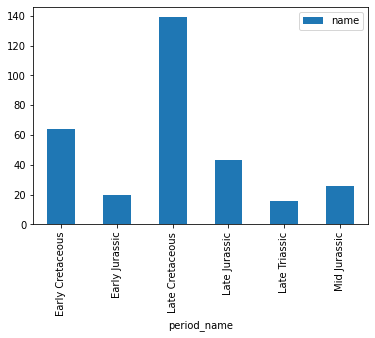

In [13]:
# Vista rapida del resultado
dino_data.groupby(dino_data["period_name"]).agg({"name": "count"}).plot(kind = "bar");

### Tratamiento de la columna 'Lenght': 
Tras revisarla es necesario:

1. Sustituir los Nan por su length correspondiente
2. Quitar la letra 'm' de metros
3. Convertir a tipo de dato integer


In [14]:
# Reviso los datos contenidos en la columna lenght
list(dino_data["length"])

['8.0m',
 '9.0m',
 '6.0m',
 '5.0m',
 '12.0m',
 '15.0m',
 '9.0m',
 '1.5m',
 '21.0m',
 '7.0m',
 '9.0m',
 '5.0m',
 '6.0m',
 '12.0m',
 '2.0m',
 '12.0m',
 '5.0m',
 '15.0m',
 '15.0m',
 '6.0m',
 '2.0m',
 '7.0m',
 '3.5m',
 '18.0m',
 '21.0m',
 '18.0m',
 '8.0m',
 '1.3m',
 '0.5m',
 '3.5m',
 '35.0m',
 '6.0m',
 '3.0m',
 '5.0m',
 '15.0m',
 '2.3m',
 '1.5m',
 '6.0m',
 '1.0m',
 '1.0m',
 '14.0m',
 '24.0m',
 '10.0m',
 '5.0m',
 '2.0m',
 '5.0m',
 '1.5m',
 '30.0m',
 '7.0m',
 '10.0m',
 '1.3m',
 '23.0m',
 '5.0m',
 '15.0m',
 '7.6m',
 '1.0m',
 '10.0m',
 '6.0m',
 '6.0m',
 '15.0m',
 '18.0m',
 '1.1m',
 '5.0m',
 '4.0m',
 '11.0m',
 '1.7m',
 '23.0m',
 '4.0m',
 '2.1m',
 '2.0m',
 '1.8m',
 '4.0m',
 '0.65m',
 '1.5m',
 '0.25m',
 '10.0m',
 '8.0m',
 '6.0m',
 '9.0m',
 '15.0m',
 '10.0m',
 '3.0m',
 '8.1m',
 '20.0m',
 '6.0m',
 '26.0m',
 '1.8m',
 '3.5m',
 '4.0m',
 '6.4m',
 nan,
 '4.0m',
 '13.0m',
 '6.0m',
 '6.2m',
 '2.0m',
 nan,
 '1.0m',
 '5.0m',
 nan,
 '15.0m',
 '3.4m',
 '10.0m',
 '7.0m',
 '6.2m',
 '7.0m',
 '4.2m',
 '4.7m',
 '6

In [15]:
# Sustituir los NaN por 0
dino_data["length"].fillna(0, inplace= True)
dino_data

name         diet       period_name  \
0            aardonyx  herbivorous    Early Jurassic   
1         abelisaurus  carnivorous   Late Cretaceous   
2       achelousaurus  herbivorous   Late Cretaceous   
3        achillobator  carnivorous   Late Cretaceous   
4    acrocanthosaurus  carnivorous  Early Cretaceous   
..                ...          ...               ...   
304     yuanmousaurus  herbivorous      Mid Jurassic   
305     yunnanosaurus   omnivorous    Early Jurassic   
306          zalmoxes  herbivorous   Late Cretaceous   
307     zephyrosaurus  herbivorous  Early Cretaceous   
308      zuniceratops  herbivorous   Late Cretaceous   

    period_year(million_years_ago)      lived_in            type length  \
0                          199-189  South Africa        sauropod   8.0m   
1                            74-70     Argentina  large theropod   9.0m   
2                            83-70           USA     ceratopsian   6.0m   
3                            99-84      Mongolia  large theropod   5.0m   
4                          115-105           USA  large theropod  12.0m   
..                             ...           ...             ...    ...   
304                        180-159         China        sauropod  17.0m   
305                        205-190         China        sauropod   7.0m   
306                             69       Romania    euornithopod   3.0m   
307                        120-110           USA    euornithopod   1.8m   
308                          94-89           USA     ceratopsian      0   

          species                                           taxonomy  \
0        celestae  Dinosauria Saurischia Sauropodomorpha Prosauro...   
1     comahuensis  Dinosauria Saurischia Theropoda Neotheropoda C...   
2         horneri  Dinosauria Ornithischia Genasauria Cerapoda Ma...   
3       giganteus  Dinosauria Saurischia Theropoda Neotheropoda T...   
4       atokensis  Dinosauria Saurischia Theropoda Neotheropoda T...   
..            ...                                                ...   
304  jiangyiensis  Dinosauria Saurischia Sauropodomorpha Sauropod...   
305        huangi  Dinosauria Saurischia Sauropodomorpha Prosauro...   
306      robustus  Dinosauria Ornithischia Genasauria Cerapoda Or...   
307       schaffi  Dinosauria Ornithischia Genasauria Cerapoda Or...   
308  christopheri  Dinosauria Ornithischia Genasauria Cerapoda Ma...   

                                              named_by  \
0    Yates Bonnan Neveling Chinsamy and Blackbeard ...   
1                           Bonaparte and Novas (1985)   
2                                      Sampson  (1995)   
3                        Perle Norell and Clark (1999)   
4                          Stovall and Langston (1950)   
..                                                 ...   
304                Lü Li Ji Wang Zhang and Dong (2006)   
305                                       Young (1942)   
306                                      Nopcsa (1902)   
307                                        Sues (1980)   
308                          Wolfe and Kirkland (1998)   

                                                 link;  \
0    https://www.nhm.ac.uk/discover/dino-directory/...   
1    https://www.nhm.ac.uk/discover/dino-directory/...   
2    https://www.nhm.ac.uk/discover/dino-directory/...   
3    https://www.nhm.ac.uk/discover/dino-directory/...   
4    https://www.nhm.ac.uk/discover/dino-directory/...   
..                                                 ...   
304  https://www.nhm.ac.uk/discover/dino-directory/...   
305  https://www.nhm.ac.uk/discover/dino-directory/...   
306  https://www.nhm.ac.uk/discover/dino-directory/...   
307  https://www.nhm.ac.uk/discover/dino-directory/...   
308  https://www.nhm.ac.uk/discover/dino-directory/...   

                                         period  
0      Early Jurassic 199-189 million years ago  
1       Late Cretaceous 74-70 million years ago  
2       Late Cretaceous 83-70 mill

In [16]:
# Diccionario con los lenght de los dinosaurios que no tienen dicha info en el dataset
dino_data_length = {"dubreuillosaurus": "9m", "eolambia": "6m", "equijubus": "7m", "graciliceratops": "2m", "isisaurus": "18m", "jinzhousaurus": "7m", "lapparentosaurus": "15m", "lesothosaurus": "2m", "liaoceratops": "0.154m", "nipponosaurus": "4m", "saltopus": "0.9m", "shamosaurus": "5m", "tanius": "7m", "therizinosaurus": "10m", "tsagantegia": "6m", "udanoceratops": "4m", "yingshanosaurus": "4.5m", "zuniceratops": "3.5m"}

In [17]:
# Incluir los lenght del diccionario en el dataframe:

for indice, fila in dino_data.iterrows():
    if fila[6] == 0:
        fila[6] = dino_data_length[fila[0]]

dino_data.head()


name         diet       period_name  \
0          aardonyx  herbivorous    Early Jurassic   
1       abelisaurus  carnivorous   Late Cretaceous   
2     achelousaurus  herbivorous   Late Cretaceous   
3      achillobator  carnivorous   Late Cretaceous   
4  acrocanthosaurus  carnivorous  Early Cretaceous   

  period_year(million_years_ago)      lived_in            type length  \
0                        199-189  South Africa        sauropod   8.0m   
1                          74-70     Argentina  large theropod   9.0m   
2                          83-70           USA     ceratopsian   6.0m   
3                          99-84      Mongolia  large theropod   5.0m   
4                        115-105           USA  large theropod  12.0m   

       species                                           taxonomy  \
0     celestae  Dinosauria Saurischia Sauropodomorpha Prosauro...   
1  comahuensis  Dinosauria Saurischia Theropoda Neotheropoda C...   
2      horneri  Dinosauria Ornithischia Genasauria Cerapoda Ma...   
3    giganteus  Dinosauria Saurischia Theropoda Neotheropoda T...   
4    atokensis  Dinosauria Saurischia Theropoda Neotheropoda T...   

                                            named_by  \
0  Yates Bonnan Neveling Chinsamy and Blackbeard ...   
1                         Bonaparte and Novas (1985)   
2                                    Sampson  (1995)   
3                      Perle Norell and Clark (1999)   
4                        Stovall and Langston (1950)   

                                               link;  \
0  https://www.nhm.ac.uk/discover/dino-directory/...   
1  https://www.nhm.ac.uk/discover/dino-directory/...   
2  https://www.nhm.ac.uk/discover/dino-directory/...   
3  https://www.nhm.ac.uk/discover/dino-directory/...   
4  https://www.nhm.ac.uk/discover/dino-directory/...   

                                       period  
0    Early Jurassic 199-189 million years ago  
1     Late Cretaceous 74-70 million years ago  
2     Late Cretaceous 83-70 million years ago  
3     Late Cretaceous 99-84 million years ago  
4  Early Cretaceous 115-105 million years ago

In [18]:
# Elimino la m de metros de la columna lenght y convierto la columna en tipo da dato float

dino_data["length"] = dino_data["length"].str.replace('m', '')
dino_data["length"] = dino_data["length"].astype("float")

In [19]:
# Reviso los tipos de datos de cada columna
dino_data.dtypes

name                               object
diet                               object
period_name                        object
period_year(million_years_ago)     object
lived_in                           object
type                               object
length                            float64
species                            object
taxonomy                           object
named_by                           object
link;                              object
period                             object
dtype: object

### Reviso como está mi dataset

In [20]:
dino_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            309 non-null    object 
 1   diet                            309 non-null    object 
 2   period_name                     308 non-null    object 
 3   period_year(million_years_ago)  306 non-null    object 
 4   lived_in                        308 non-null    object 
 5   type                            309 non-null    object 
 6   length                          309 non-null    float64
 7   species                         304 non-null    object 
 8   taxonomy                        309 non-null    object 
 9   named_by                        309 non-null    object 
 10  link;                           309 non-null    object 
 11  period                          309 non-null    object 
dtypes: float64(1), object(11)
memory usa

### ¿Me quedan más Nan? 

In [21]:
dino_data.isna().sum()


name                              0
diet                              0
period_name                       1
period_year(million_years_ago)    3
lived_in                          1
type                              0
length                            0
species                           5
taxonomy                          0
named_by                          0
link;                             0
period                            0
dtype: int64

#### Interesante revisar columnas: 
* "period_name "
* "lived_in"
* "diet"

### Tratamiento de las columnas "period_name" y "lived_in":
Localizar el Nan y sustituirlo

In [22]:
# Dinosaurios por periodo
dino_data["period_name"].value_counts(dropna=False)

Late Cretaceous     139
Early Cretaceous     64
Late Jurassic        43
Mid Jurassic         26
Early Jurassic       20
Late Triassic        16
NaN                   1
Name: period_name, dtype: int64

In [23]:
# Localizo dinosaurio sin periodo, también es al que le falta "lived_in"
dino_nan = dino_data["period_name"].isnull()
dino_data[dino_nan]

name        diet period_name period_year(million_years_ago)  \
125  hagryphus  omnivorous         NaN                           None   

    lived_in            type  length    species  \
125      NaN  small theropod     3.0  giganteus   

                                              taxonomy  \
125  Dinosauria Saurischia Theropoda Neotheropoda T...   

                     named_by  \
125  Zanno and Sampson (2005)   

                                                 link; period  
125  https://www.nhm.ac.uk/discover/dino-directory/...    USA

In [24]:
# Atribuyo el periodo y su localización a este dinosurio
dino_data.iloc[125,2] = "Late Cretaceous"
dino_data.iloc[125,4] = "USA"
dino_data[dino_nan]

name        diet      period_name period_year(million_years_ago)  \
125  hagryphus  omnivorous  Late Cretaceous                           None   

    lived_in            type  length    species  \
125      USA  small theropod     3.0  giganteus   

                                              taxonomy  \
125  Dinosauria Saurischia Theropoda Neotheropoda T...   

                     named_by  \
125  Zanno and Sampson (2005)   

                                                 link; period  
125  https://www.nhm.ac.uk/discover/dino-directory/...    USA

### Tratamiento de la columna "diet":
Localizo los "unknown" para asignarles su dieta correpondiente

In [25]:
falta_diet = dino_data[dino_data["diet"] == "unknown"]
falta_diet

name     diet      period_name period_year(million_years_ago)  \
182        mononykus  unknown  Late Cretaceous                          81-68   
281  therizinosaurus  unknown  Late Cretaceous                          85-70   

     lived_in            type  length        species  \
182  Mongolia  small theropod     1.0      olecranus   
281  Mongolia  large theropod    10.0  cheloniformis   

                                              taxonomy  \
182  Dinosauria Saurischia Theropoda Neotheropoda T...   
281  Dinosauria Saurischia Theropoda Neotheropoda T...   

                                  named_by  \
182  Perle Norell Chiappe and Clark (1993)   
281                          Maleev (1915)   

                                                 link;  \
182  https://www.nhm.ac.uk/discover/dino-directory/...   
281  https://www.nhm.ac.uk/discover/dino-directory/...   

                                      period  
182  Late Cretaceous 81-68 million years ago  
281  Late Cretaceous 85-70 million years ago

In [26]:
dino_data.iloc[155,5] = "small theropod"
dino_data.iloc[155,]

name                                                                  lesothosaurus
diet                                                                    herbivorous
period_name                                                          Early Jurassic
period_year(million_years_ago)                                              213-200
lived_in                                                                    Lesotho
type                                                                 small theropod
length                                                                          2.0
species                                                                diagnosticus
taxonomy                                                    Dinosauria Ornithischia
named_by                                                              Galton (1978)
link;                             https://www.nhm.ac.uk/discover/dino-directory/...
period                                     Early Jurassic 213-200 million ye

In [27]:
dino_data.iloc[182,1] = "carnivorous"
dino_data.iloc[281,1] = "omnivorous"

In [28]:
# Cambio realizado en mononykus
dino_data.iloc[182,]

name                                                                      mononykus
diet                                                                    carnivorous
period_name                                                         Late Cretaceous
period_year(million_years_ago)                                                81-68
lived_in                                                                   Mongolia
type                                                                 small theropod
length                                                                          1.0
species                                                                   olecranus
taxonomy                          Dinosauria Saurischia Theropoda Neotheropoda T...
named_by                                      Perle Norell Chiappe and Clark (1993)
link;                             https://www.nhm.ac.uk/discover/dino-directory/...
period                                      Late Cretaceous 81-68 million ye

In [29]:
# Cambio realizado en therizinosaurus
dino_data.iloc[281,]

name                                                                therizinosaurus
diet                                                                     omnivorous
period_name                                                         Late Cretaceous
period_year(million_years_ago)                                                85-70
lived_in                                                                   Mongolia
type                                                                 large theropod
length                                                                         10.0
species                                                               cheloniformis
taxonomy                          Dinosauria Saurischia Theropoda Neotheropoda T...
named_by                                                              Maleev (1915)
link;                             https://www.nhm.ac.uk/discover/dino-directory/...
period                                      Late Cretaceous 85-70 million ye

In [30]:
dino_data.type.unique()

array(['sauropod', 'large theropod', 'ceratopsian', 'euornithopod',
       'small theropod', 'armoured dinosaur'], dtype=object)

## 3. Preparación de los datos

#### Me creo nueva columna "Continent" en función de la columna "live_in" que contiene el país:

In [31]:
def look_for_continent(x):
    if x in ["USA", "Canada"]:
        x = "América del Norte"    
    elif x in ["China", "Mongolia", "India", "Uzbekistan", "Kazakhstan", "Japan"]:        
        x = "Asia" 
    elif x in ["United Kingdom", "Germany", "Spain", "France", "Russia", "Romania", "Wales", "Switzerland"]:
        x = "Europa"
    elif x in ["Argentina", "Brazil", "Uruguay"]:
        x = "America del Sur"
    elif x in ["Niger", "Tanzania", "South Africa", "Zimbabwe", "Morocco", "Madagascar", "Egypt", "Tunisia", "North Africa", "Malawi", "Lesotho"]:
        x = "Africa"
    elif x in ["Australia"]:
        x = "Oceanía"
    elif x in ["Antactica"]:
        x = "Antactica"
    return x

dino_data["continent"] = dino_data["lived_in"].apply(look_for_continent)

dino_data

name         diet       period_name  \
0            aardonyx  herbivorous    Early Jurassic   
1         abelisaurus  carnivorous   Late Cretaceous   
2       achelousaurus  herbivorous   Late Cretaceous   
3        achillobator  carnivorous   Late Cretaceous   
4    acrocanthosaurus  carnivorous  Early Cretaceous   
..                ...          ...               ...   
304     yuanmousaurus  herbivorous      Mid Jurassic   
305     yunnanosaurus   omnivorous    Early Jurassic   
306          zalmoxes  herbivorous   Late Cretaceous   
307     zephyrosaurus  herbivorous  Early Cretaceous   
308      zuniceratops  herbivorous   Late Cretaceous   

    period_year(million_years_ago)      lived_in            type  length  \
0                          199-189  South Africa        sauropod     8.0   
1                            74-70     Argentina  large theropod     9.0   
2                            83-70           USA     ceratopsian     6.0   
3                            99-84      Mongolia  large theropod     5.0   
4                          115-105           USA  large theropod    12.0   
..                             ...           ...             ...     ...   
304                        180-159         China        sauropod    17.0   
305                        205-190         China        sauropod     7.0   
306                             69       Romania    euornithopod     3.0   
307                        120-110           USA    euornithopod     1.8   
308                          94-89           USA     ceratopsian     3.5   

          species                                           taxonomy  \
0        celestae  Dinosauria Saurischia Sauropodomorpha Prosauro...   
1     comahuensis  Dinosauria Saurischia Theropoda Neotheropoda C...   
2         horneri  Dinosauria Ornithischia Genasauria Cerapoda Ma...   
3       giganteus  Dinosauria Saurischia Theropoda Neotheropoda T...   
4       atokensis  Dinosauria Saurischia Theropoda Neotheropoda T...   
..            ...                                                ...   
304  jiangyiensis  Dinosauria Saurischia Sauropodomorpha Sauropod...   
305        huangi  Dinosauria Saurischia Sauropodomorpha Prosauro...   
306      robustus  Dinosauria Ornithischia Genasauria Cerapoda Or...   
307       schaffi  Dinosauria Ornithischia Genasauria Cerapoda Or...   
308  christopheri  Dinosauria Ornithischia Genasauria Cerapoda Ma...   

                                              named_by  \
0    Yates Bonnan Neveling Chinsamy and Blackbeard ...   
1                           Bonaparte and Novas (1985)   
2                                      Sampson  (1995)   
3                        Perle Norell and Clark (1999)   
4                          Stovall and Langston (1950)   
..                                                 ...   
304                Lü Li Ji Wang Zhang and Dong (2006)   
305                                       Young (1942)   
306                                      Nopcsa (1902)   
307                                        Sues (1980)   
308                          Wolfe and Kirkland (1998)   

                                                 link;  \
0    https://www.nhm.ac.uk/discover/dino-directory/...   
1    https://www.nhm.ac.uk/discover/dino-directory/...   
2    https://www.nhm.ac.uk/discover/dino-directory/...   
3    https://www.nhm.ac.uk/discover/dino-directory/...   
4    https://www.nhm.ac.uk/discover/dino-directory/...   
..                                                 ...   
304  https://www.nhm.ac.uk/discover/dino-directory/...   
305  https://www.nhm.ac.uk/discover/dino-directory/...   
306  https://www.nhm.ac.uk/discover/dino-directory/...   
307  https://www.nhm.ac.uk/discover/dino-directory/...   
308  https://www.nhm.ac.uk/discover/dino-directory/...   

                                         period          continent  
0      Early Jurassic 199-189 million years ago             Africa  
1       Late Cretaceous 74-70 mill

### Por último voy a quedarme con las columnas que más me interesan para hacer el análisis

In [32]:
dino_data.columns

Index(['name', 'diet', 'period_name', 'period_year(million_years_ago)',
       'lived_in', 'type', 'length', 'species', 'taxonomy', 'named_by',
       'link;', 'period', 'continent'],
      dtype='object')

In [33]:
dino_data = dino_data[["name", "diet", "period_name", "period_year(million_years_ago)", "continent", "lived_in", "type", "length", "named_by"]]

In [34]:
dino_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            309 non-null    object 
 1   diet                            309 non-null    object 
 2   period_name                     309 non-null    object 
 3   period_year(million_years_ago)  306 non-null    object 
 4   continent                       309 non-null    object 
 5   lived_in                        309 non-null    object 
 6   type                            309 non-null    object 
 7   length                          309 non-null    float64
 8   named_by                        309 non-null    object 
dtypes: float64(1), object(8)
memory usage: 21.9+ KB


## 4. BBDD preparada: guardo como csv con los cambios realizados

In [35]:
dino_data.to_csv("The_Exhaustive_Dinosaur_Dataset_prepared.csv", index = False)

## 5.1. BBDD Fandom obtenida por web scrapping

### Exporto csv obtenido haciendo web scrapping

In [36]:
# Exporto csv Fandom dinos
dino_fandom = pd.read_csv("df_dinos_fandom_completo.csv")
dino_fandom.head(10)

Nombre      Altura                   Peso
0                 Aardonyx  1,3 metros          1.4 toneladas
1             Abdarainurus  4-5 metros                    Nan
2          Nuevas imágenes         Nan                    Nan
3                      NaN         Nan                    Nan
4                      NaN         Nan                    Nan
5  Abelisaurus Comahuensis    2 metros           1400-3000 Kg
6    Abrictosaurus consors       40 cm                  27 kg
7               Abrosaurus    4 metros            7 toneladas
8    Abydosaurus mcintoshi    7 metros           22 toneladas
9   Acantholipan gonzalezi         Nan  Más de media tonelada

In [37]:
# Veo la forma que tiene el Dataframe
dino_fandom.shape

(1192, 3)

In [38]:
# Elimino filas duplicadas
dino_fandom.drop_duplicates(ignore_index = True, inplace=True)

In [39]:
# El dataframe queda con esta forma
dino_fandom.shape

(877, 3)

In [40]:
dino_fandom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  876 non-null    object
 1   Altura  877 non-null    object
 2   Peso    877 non-null    object
dtypes: object(3)
memory usage: 20.7+ KB


In [41]:
dino_fandom.dropna(inplace = True)

In [42]:
dino_fandom.shape

(876, 3)

#### Cambios en columna 'Nombre'
* Renombro el nombre de la columna
* Convierto todos los strings a minusculas

In [43]:
dino_fandom.rename(columns= {"Nombre": "name"}, inplace=True)

In [44]:
dino_fandom["name"] = dino_fandom["name"].map(lambda x: x.lower())
dino_fandom["name"]

0                     aardonyx
1                 abdarainurus
2              nuevas imágenes
4      abelisaurus comahuensis
5        abrictosaurus consors
                ...           
872                   ziapelta
873               zuniceratops
874                    zuolong
875                zupaysaurus
876                       zuul
Name: name, Length: 876, dtype: object

## 5.2. Unificar 2 BBDD: original y fandom

In [45]:

dino_data_mix = pd.merge(dino_data, dino_fandom, on= "name", how = "left", indicator = True)
dino_data_mix

name         diet       period_name  \
0            aardonyx  herbivorous    Early Jurassic   
1         abelisaurus  carnivorous   Late Cretaceous   
2       achelousaurus  herbivorous   Late Cretaceous   
3        achillobator  carnivorous   Late Cretaceous   
4    acrocanthosaurus  carnivorous  Early Cretaceous   
..                ...          ...               ...   
304     yuanmousaurus  herbivorous      Mid Jurassic   
305     yunnanosaurus   omnivorous    Early Jurassic   
306          zalmoxes  herbivorous   Late Cretaceous   
307     zephyrosaurus  herbivorous  Early Cretaceous   
308      zuniceratops  herbivorous   Late Cretaceous   

    period_year(million_years_ago)          continent      lived_in  \
0                          199-189             Africa  South Africa   
1                            74-70    America del Sur     Argentina   
2                            83-70  América del Norte           USA   
3                            99-84               Asia      Mongolia   
4                          115-105  América del Norte           USA   
..                             ...                ...           ...   
304                        180-159               Asia         China   
305                        205-190               Asia         China   
306                             69             Europa       Romania   
307                        120-110  América del Norte           USA   
308                          94-89  América del Norte           USA   

               type  length  \
0          sauropod     8.0   
1    large theropod     9.0   
2       ceratopsian     6.0   
3    large theropod     5.0   
4    large theropod    12.0   
..              ...     ...   
304        sauropod    17.0   
305        sauropod     7.0   
306    euornithopod     3.0   
307    euornithopod     1.8   
308     ceratopsian     3.5   

                                              named_by  \
0    Yates Bonnan Neveling Chinsamy and Blackbeard ...   
1                           Bonaparte and Novas (1985)   
2                                      Sampson  (1995)   
3                        Perle Norell and Clark (1999)   
4                          Stovall and Langston (1950)   
..                                                 ...   
304                Lü Li Ji Wang Zhang and Dong (2006)   
305                                       Young (1942)   
306                                      Nopcsa (1902)   
307                                        Sues (1980)   
308                          Wolfe and Kirkland (1998)   

                          Altura                       Peso     _merge  
0                     1,3 metros              1.4 toneladas       both  
1                            NaN                        NaN  left_only  
2                       2 metros  posiblemente, 2 toneladas       both  
3                     1,6 metros                     520 kg       both  
4                       4 metros                5 toneladas       both  
..                           ...                        ...        ...  
304                          NaN                        NaN  left_only  
305                   2,2 metros              2,7 toneladas       both  
306                          Nan                     133 kg       both  
307                        50 cm                        Nan       both  
308  1 metro (hasta las caderas)                 1 tonelada       both  

[309 rows x 12 columns]

##### ¡¡¡¡BIEN!!!! he combinado ambas BBDD.

#### Voy a ver cuantos datos nos faltan

In [46]:

dino_data_mix.isnull().sum()

name                               0
diet                               0
period_name                        0
period_year(million_years_ago)     3
continent                          0
lived_in                           0
type                               0
length                             0
named_by                           0
Altura                            51
Peso                              51
_merge                             0
dtype: int64

In [47]:
# Observo formato de alturas
list(dino_data_mix["Altura"])

['1,3 metros',
 nan,
 '2 metros',
 '1,6 metros',
 '4 metros',
 '5 metros',
 '2,3 metros',
 '40 cm',
 'entre 6 y 7 metros',
 '1,9 a 2,5 metros',
 '2.8 metros',
 '2 metros',
 '2 metros',
 '2 a 3 metros (según la especie)',
 '70 cm',
 '4 metros',
 '1,8 metros erguido',
 '3,8 metros',
 '4 metros',
 '2 metros',
 '70 cm',
 '2,40 metros de los pies hasta la espina mas alta y de los pies hasta la espalda 2,30',
 '1,7 metros',
 '6 a 8 m, 12 m (cuello erguido) y 20 m (posado en 2 patas)',
 '4,4 metros',
 '8 metros',
 nan,
 'Nan',
 nan,
 '1,6 metros',
 '6,8 Metros (Hasta los hombros)',
 '2,4 metros',
 '70 cm',
 nan,
 'Nan',
 '80 cm',
 '1 metro',
 '2 metros',
 '20 cm',
 '30 centímetros',
 '5 a 6 metros',
 '6 metros',
 '2.5 metros a la cadera',
 '2,3 metros',
 '1,7 metros',
 nan,
 '80 cm',
 '12 - 15 metros',
 '2,5 metros',
 '3 metros',
 '40 cm',
 '9 metros',
 nan,
 '3,5 metros a 6 (según la especie)',
 '3,5 metros',
 '30 cm',
 'Nan',
 '2,3 metros',
 '2 metros',
 nan,
 nan,
 '1 mts',
 '2 metros',
 '

In [48]:
# Observo formato de alturas
list(dino_data_mix["Peso"])

['1.4 toneladas',
 nan,
 'posiblemente, 2 toneladas',
 '520 kg',
 '5 toneladas',
 '17 toneladas',
 '1,5 toneladas',
 '22 kg',
 '27 toneladas',
 '453 kg',
 '2,5 toneladas',
 '1,2 toneladas',
 '400 kg',
 '1,5 - 3 toneladas (según la especie)',
 '20 kg',
 '8 toneladas',
 '45 kilogramos',
 '6 toneladas',
 'Nan',
 '4,8 toneladas',
 '25 kg',
 '8 toneladas',
 '60 kg',
 'Entre 20 y 60 toneladas',
 '31 toneladas',
 '22 toneladas',
 nan,
 '24 kg',
 nan,
 '75 kg',
 '75 toneladas',
 '6 toneladas',
 '95 kg',
 nan,
 '10 toneladas',
 '60 kg',
 '20 kg',
 '1,5 toneladas',
 '30 kg',
 '2 kg',
 '12 toneladas',
 '34 toneladas',
 '1.700-2.700 kilogramos',
 '2,8 toneladas',
 '85 kg',
 nan,
 '30 kg',
 '33 - 37 toneladas',
 '3,7 toneladas',
 '4 toneladas',
 '5 kg',
 '26 toneladas',
 nan,
 '4,2 a 8 toneladas (según la especie)',
 '1,3 - 2,1 toneladas',
 '6 kg',
 'Nan',
 '4 toneladas',
 '1 tonelada',
 nan,
 nan,
 '108kg',
 '4 toneladas',
 'Nan',
 nan,
 '60 kg',
 '18 toneladas',
 '560 kg',
 'Nan',
 'Entre 15 y 30

#### Se observan unos datos con patrones poco homogeneos. A priori se podría aplicar un Regex. Vamos a seguir observando los datos.

In [49]:
# Cuantros Nan tiene la columna 'Altura'
dino_data_mix[dino_data_mix["Altura"] == "Nan"]

name         diet       period_name  \
27   archaeoceratops  herbivorous  Early Cretaceous   
34      austrosaurus  herbivorous  Early Cretaceous   
56        cedarpelta  herbivorous  Early Cretaceous   
107      fukuisaurus  herbivorous  Early Cretaceous   
131        heyuannia   omnivorous   Late Cretaceous   
156     liaoceratops  herbivorous  Early Cretaceous   
173   maxakalisaurus  herbivorous   Late Cretaceous   
179      microraptor  carnivorous  Early Cretaceous   
201       orodromeus  herbivorous   Late Cretaceous   
306         zalmoxes  herbivorous   Late Cretaceous   

    period_year(million_years_ago)          continent   lived_in  \
27                          121-99               Asia      China   
34                          112-99            Oceanía  Australia   
56                         142-127  América del Norte        USA   
107                         121-99               Asia      Japan   
131                          72-68               Asia   Mongolia   
156                        127-121               Asia      China   
173                             80    America del Sur     Brazil   
179                        125-122               Asia      China   
201                             74  América del Norte        USA   
306                             69             Europa    Romania   

                  type  length                                  named_by  \
27         ceratopsian   1.300                     Dong and Azuma (1987)   
34            sauropod  15.000                            Longman (1933)   
56   armoured dinosaur  10.000  Carpenter Kirkland Burge and Bird (2001)   
107       euornithopod   4.700                Kobayashi and Azuma (2003)   
131     small theropod   2.000                           Barsbold (1981)   
156        ceratopsian   0.154   Xu Makovicky Wang Norell and You (2002)   
173           sauropod  13.000                     Kellner et al. (2006)   
179     small theropod   0.800                   Xu Zhou and Wang (2000)   
201       euornithopod   2.000              Horner and Weishampel (1988)   
306       euornithopod   3.000                             Nopcsa (1902)   

    Altura           Peso _merge  
27     Nan          24 kg   both  
34     Nan   10 toneladas   both  
56     Nan            Nan   both  
107    Nan         400 kg   both  
131    Nan  20 kilogramos   both  
156    Nan   3 kilogramos   both  
173    Nan    9 toneladas   both  
179    Nan         1 kilo   both  
201    Nan            Nan   both  
306    Nan         133 kg   both

Se piensa en traer las alturas de dinosaurios que faltan pasándolas a través de un diccionario.


##### **En la búsqueda de datos faltantes se detecta nueva web con informació más estructurada, así que decido hacer un nuevo web scrapping sobre dicha web ABCDinos**

## 6.1. BBDD ABCDinos obtenida por web scrapping

In [50]:
# Exporto csv abc dinos
dino_abcdinos = pd.read_csv("df_dinos_abcdinos.csv")
dino_abcdinos.head(10)

Nombre      Altura         Peso
0          Aardonyx  1.8 metros    450 kilos
1       Abelisaurus    2 metros   3000 kilos
2     Achelousaurus    3 metros   3000 kilos
3      Achillobator    2 metros    550 kilos
4  Acrocanthosaurus         NaN          NaN
5     Aegyptosaurus    5 metros  10500 kilos
6       Afrovenator    1 metros   1000 kilos
7       Agilisaurus  0.6 metros     40 kilos
8       Alamosaurus   13 metros  50000 kilos
9   Albertaceratops    2 metros   3500 kilos

In [51]:
# Veo la forma que tiene el Dataframe
dino_abcdinos.shape

(308, 3)

In [52]:
# Observo la info contenido
dino_abcdinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  308 non-null    object
 1   Altura  277 non-null    object
 2   Peso    300 non-null    object
dtypes: object(3)
memory usage: 7.3+ KB


In [53]:
# Renombro columna para cruzar esta BBDD con la BBDD base del inicio
dino_abcdinos.rename(columns= {"Nombre": "name"}, inplace=True)

In [54]:
# Convierto todos los nombres a minúsculas para facilitar también el cruce
dino_abcdinos["name"] = dino_abcdinos["name"].map(lambda x: x.lower())
dino_abcdinos["name"]

0              aardonyx
1           abelisaurus
2         achelousaurus
3          achillobator
4      acrocanthosaurus
             ...       
303             yinlong
304       yuanmousaurus
305       yunnanosaurus
306            zalmoxes
307       zephyrosaurus
Name: name, Length: 308, dtype: object

## 6.2. Unificar 3 BBDD: original, ABCDinos y fandom

#### BBDD original con ABCDinos

In [55]:

dino_data_mixabc = pd.merge(dino_data, dino_abcdinos, on= "name", how = "left", indicator = True)
dino_data_mixabc.head()

name         diet       period_name  \
0          aardonyx  herbivorous    Early Jurassic   
1       abelisaurus  carnivorous   Late Cretaceous   
2     achelousaurus  herbivorous   Late Cretaceous   
3      achillobator  carnivorous   Late Cretaceous   
4  acrocanthosaurus  carnivorous  Early Cretaceous   

  period_year(million_years_ago)          continent      lived_in  \
0                        199-189             Africa  South Africa   
1                          74-70    America del Sur     Argentina   
2                          83-70  América del Norte           USA   
3                          99-84               Asia      Mongolia   
4                        115-105  América del Norte           USA   

             type  length                                           named_by  \
0        sauropod     8.0  Yates Bonnan Neveling Chinsamy and Blackbeard ...   
1  large theropod     9.0                         Bonaparte and Novas (1985)   
2     ceratopsian     6.0                                    Sampson  (1995)   
3  large theropod     5.0                      Perle Norell and Clark (1999)   
4  large theropod    12.0                        Stovall and Langston (1950)   

       Altura        Peso _merge  
0  1.8 metros   450 kilos   both  
1    2 metros  3000 kilos   both  
2    3 metros  3000 kilos   both  
3    2 metros   550 kilos   both  
4         NaN         NaN   both

##### Vengaaaaaaaaaaaaaaaaaaaa! ya tengo otro mix hecho!

In [56]:
# Guardo csv con el contenido de esta tabla: cruce del primer csv DinoData con csv del web scrapping de ABCDino
dino_data_mixabc.to_csv("The_Exhaustive_Dinosaur_and_ABCDino.csv", index = False)

In [57]:
dino_data_mix[dino_data_mix["Altura"] == "Nan"]

name         diet       period_name  \
27   archaeoceratops  herbivorous  Early Cretaceous   
34      austrosaurus  herbivorous  Early Cretaceous   
56        cedarpelta  herbivorous  Early Cretaceous   
107      fukuisaurus  herbivorous  Early Cretaceous   
131        heyuannia   omnivorous   Late Cretaceous   
156     liaoceratops  herbivorous  Early Cretaceous   
173   maxakalisaurus  herbivorous   Late Cretaceous   
179      microraptor  carnivorous  Early Cretaceous   
201       orodromeus  herbivorous   Late Cretaceous   
306         zalmoxes  herbivorous   Late Cretaceous   

    period_year(million_years_ago)          continent   lived_in  \
27                          121-99               Asia      China   
34                          112-99            Oceanía  Australia   
56                         142-127  América del Norte        USA   
107                         121-99               Asia      Japan   
131                          72-68               Asia   Mongolia   
156                        127-121               Asia      China   
173                             80    America del Sur     Brazil   
179                        125-122               Asia      China   
201                             74  América del Norte        USA   
306                             69             Europa    Romania   

                  type  length                                  named_by  \
27         ceratopsian   1.300                     Dong and Azuma (1987)   
34            sauropod  15.000                            Longman (1933)   
56   armoured dinosaur  10.000  Carpenter Kirkland Burge and Bird (2001)   
107       euornithopod   4.700                Kobayashi and Azuma (2003)   
131     small theropod   2.000                           Barsbold (1981)   
156        ceratopsian   0.154   Xu Makovicky Wang Norell and You (2002)   
173           sauropod  13.000                     Kellner et al. (2006)   
179     small theropod   0.800                   Xu Zhou and Wang (2000)   
201       euornithopod   2.000              Horner and Weishampel (1988)   
306       euornithopod   3.000                             Nopcsa (1902)   

    Altura           Peso _merge  
27     Nan          24 kg   both  
34     Nan   10 toneladas   both  
56     Nan            Nan   both  
107    Nan         400 kg   both  
131    Nan  20 kilogramos   both  
156    Nan   3 kilogramos   both  
173    Nan    9 toneladas   both  
179    Nan         1 kilo   both  
201    Nan            Nan   both  
306    Nan         133 kg   both

In [58]:
dino_data_mixabc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   name                            309 non-null    object  
 1   diet                            309 non-null    object  
 2   period_name                     309 non-null    object  
 3   period_year(million_years_ago)  306 non-null    object  
 4   continent                       309 non-null    object  
 5   lived_in                        309 non-null    object  
 6   type                            309 non-null    object  
 7   length                          309 non-null    float64 
 8   named_by                        309 non-null    object  
 9   Altura                          275 non-null    object  
 10  Peso                            297 non-null    object  
 11  _merge                          309 non-null    category
dtypes: category(1), float6

In [59]:
# Cuantos dinosaurios tienen valor nulo en la columna 'Altura'
len(dino_data_mixabc[dino_data_mixabc["Altura"].isnull()== True])

34

In [60]:
# Cuantos dinosaurios tienen valor nulo en la columna 'Peso'
len(dino_data_mixabc[dino_data_mixabc["Peso"].isnull()== True])

12

#### Extracción de dinosaurios sin "altura":

In [61]:

name_faltan_altura = dino_data_mixabc[dino_data_mixabc["Altura"].isnull()== True][["name", "Altura", "Peso"]]

#### Voy a **cruzar este grupo de dinosaurios sin alturas con la BBDD de Fandom** a ver si de allí puedo conseguir traer los datos.
#### También observaré los **pesos por si también puedo combinarlos**.

In [62]:
dinoabc_con_fandom = pd.merge(name_faltan_altura, dino_fandom, on= "name", how = "inner", indicator = True)

#dinoabc_con_fandom.columns = ['name', 'Altura_x', 'Peso_x', 'Altura', 'Peso', 'merge']

dinoabc_con_fandom

name Altura_x       Peso_x                         Altura_y  \
0    acrocanthosaurus      NaN          NaN                         4 metros   
1          allosaurus      NaN          NaN  2 a 3 metros (según la especie)   
2         anserimimus      NaN     50 kilos                       1,7 metros   
3   brachytrachelopan      NaN   9000 kilos                         3 metros   
4      chaoyangsaurus      NaN     10 kilos                            1 mts   
5    dubreuillosaurus      NaN    250 kilos                            2,1 m   
6        europasaurus      NaN    500 kilos                       2,7 metros   
7       hesperosaurus      NaN   3500 kilos                      2,5 de alto   
8           heyuannia      NaN     20 kilos                              Nan   
9         juravenator      NaN      1 kilos                            20 cm   
10              khaan      NaN     14 kilos                   50 centímetros   
11      ligabuesaurus      NaN          NaN                        13 metros   
12       marshosaurus      NaN    200 kilos                         2 metros   
13     maxakalisaurus      NaN          NaN                              Nan   
14       nedoceratops      NaN  12000 kilos                         2 metros   
15           nomingia      NaN     20 kilos                          1 metro   
16        protohadros      NaN          NaN                         3 metros   
17     rebbachisaurus      NaN   7000 kilos                     6 a 8 metros   
18        shamosaurus      NaN   2000 kilos                         2 metros   
19             shanag      NaN      5 kilos                            30 cm   
20   sinocalliopteryx      NaN     20 kilos                          1 metro   
21        stegosaurus      NaN          NaN                       3,7 metros   
22      tyrannosaurus      NaN          NaN                         3 metros   
23       zuniceratops      NaN          NaN      1 metro (hasta las caderas)   

                                  Peso_y _merge  
0                            5 toneladas   both  
1   1,5 - 3 toneladas (según la especie)   both  
2                                  60 kg   both  
3                            4 toneladas   both  
4                                  108kg   both  
5                         250 kilogramos   both  
6                                  2,7 T   both  
7                            3 toneladas   both  
8                          20 kilogramos   both  
9                                 2-5 kg   both  
10                                   Nan   both  
11                          13 toneladas   both  
12                             340 kilos   both  
13                           9 toneladas   both  
14                         4,5 toneladas   both  
15                                 60 kg   both  
16                            1 tonelada   both  
17                          28 toneladas   both  
18                         2,5 toneladas   both  
19                          2 kilogramos   both  
20                         15 kilogramos   both  
21                           8 toneladas   both  
22                       7-8.8 toneladas   both  
23                            1 tonelada   both

In [63]:
dinoabc_con_fandom.to_csv("ABCdino_con_fandom.csv", index = False)

In [64]:
combined_ABCDino_fandom = pd.read_excel("ABCdino_con_fandom.xlsx")
combined_ABCDino_fandom

name  Altura_x       Peso_x Altura_y       Peso_y _merge
0    acrocanthosaurus       NaN          NaN      4 m   5000 kilos   both
1          allosaurus       NaN          NaN    2.5 m   2200 kilos   both
2         anserimimus       NaN     50 kilos    1.7 m     60 kilos   both
3   brachytrachelopan       NaN   9000 kilos      3 m   5000 kilos   both
4      chaoyangsaurus       NaN     10 kilos      1 m    108 kilos   both
5    dubreuillosaurus       NaN    250 kilos    2.1 m    250 kilos   both
6        europasaurus       NaN    500 kilos    2.7 m   2700 kilos   both
7       hesperosaurus       NaN   3500 kilos    2.5 m   3000 kilos   both
8           heyuannia       NaN     20 kilos    1.5 m     20 kilos   both
9         juravenator       NaN      1 kilos    0.2 m   2500 kilos   both
10              khaan       NaN     14 kilos   0.50 m     14 kilos   both
11      ligabuesaurus       NaN          NaN     13 m  13000 kilos   both
12       marshosaurus       NaN    200 kilos      2 m    340 kilos   both
13     maxakalisaurus       NaN          NaN     13 m   9000 kilos   both
14       nedoceratops       NaN  12000 kilos      2 m   4500 kilos   both
15           nomingia       NaN     20 kilos      1 m     60 kilos   both
16        protohadros       NaN          NaN      3 m   1000 kilos   both
17     rebbachisaurus       NaN   7000 kilos      7 m   2800 kilos   both
18        shamosaurus       NaN   2000 kilos      2 m   2500 kilos   both
19             shanag       NaN      5 kilos    0.3 m      2 kilos   both
20   sinocalliopteryx       NaN     20 kilos      1 m     15 kilos   both
21        stegosaurus       NaN          NaN    3.7 m   8000 kilos   both
22      tyrannosaurus       NaN          NaN      3 m   8000 kilos   both
23       zuniceratops       NaN          NaN      1 m   1000 kilos   both

In [65]:
#dino_data_fusion = pd.merge(dino_data_mixabc, combined_ABCDino_fandom, on = "name", how = "left")
dino_fusion = pd.merge(dino_data_mixabc, combined_ABCDino_fandom, on= "name", how = "left")
#dino_data_fusion
dino_fusion

name         diet       period_name  \
0            aardonyx  herbivorous    Early Jurassic   
1         abelisaurus  carnivorous   Late Cretaceous   
2       achelousaurus  herbivorous   Late Cretaceous   
3        achillobator  carnivorous   Late Cretaceous   
4    acrocanthosaurus  carnivorous  Early Cretaceous   
..                ...          ...               ...   
304     yuanmousaurus  herbivorous      Mid Jurassic   
305     yunnanosaurus   omnivorous    Early Jurassic   
306          zalmoxes  herbivorous   Late Cretaceous   
307     zephyrosaurus  herbivorous  Early Cretaceous   
308      zuniceratops  herbivorous   Late Cretaceous   

    period_year(million_years_ago)          continent      lived_in  \
0                          199-189             Africa  South Africa   
1                            74-70    America del Sur     Argentina   
2                            83-70  América del Norte           USA   
3                            99-84               Asia      Mongolia   
4                          115-105  América del Norte           USA   
..                             ...                ...           ...   
304                        180-159               Asia         China   
305                        205-190               Asia         China   
306                             69             Europa       Romania   
307                        120-110  América del Norte           USA   
308                          94-89  América del Norte           USA   

               type  length  \
0          sauropod     8.0   
1    large theropod     9.0   
2       ceratopsian     6.0   
3    large theropod     5.0   
4    large theropod    12.0   
..              ...     ...   
304        sauropod    17.0   
305        sauropod     7.0   
306    euornithopod     3.0   
307    euornithopod     1.8   
308     ceratopsian     3.5   

                                              named_by      Altura  \
0    Yates Bonnan Neveling Chinsamy and Blackbeard ...  1.8 metros   
1                           Bonaparte and Novas (1985)    2 metros   
2                                      Sampson  (1995)    3 metros   
3                        Perle Norell and Clark (1999)    2 metros   
4                          Stovall and Langston (1950)         NaN   
..                                                 ...         ...   
304                Lü Li Ji Wang Zhang and Dong (2006)         NaN   
305                                       Young (1942)    2 metros   
306                                      Nopcsa (1902)  0.7 metros   
307                                        Sues (1980)    1 metros   
308                          Wolfe and Kirkland (1998)         NaN   

            Peso   _merge_x  Altura_x Peso_x Altura_y      Peso_y _merge_y  
0      450 kilos       both       NaN    NaN      NaN         NaN      NaN  
1     3000 kilos       both       NaN    NaN      NaN         NaN      NaN  
2     3000 kilos       both       NaN    NaN      NaN         NaN      NaN  
3      550 kilos       both       NaN    NaN      NaN         NaN      NaN  
4            NaN       both       NaN    NaN      4 m  5000 kilos     both  
..           ...        ...       ...    ...      ...         ...      ...  
304  18143 kilos       both       NaN    NaN      NaN         NaN      NaN  
305          NaN       both       NaN    NaN      NaN         NaN      NaN  
306     80 kilos       both       NaN    NaN      NaN         NaN      NaN  
307     20 kilos       both       NaN    NaN      NaN         NaN      NaN  
308          NaN  left_only       NaN    NaN      1 m  1000 kilos     both  

[309 rows x 17 columns]

In [66]:
for ind, row in dino_fusion.iterrows():
    if row.iloc[9] == "nan":
        print(row.iloc[9])

In [67]:
dino_fusion["Altura"].fillna(0, inplace= True)
dino_fusion

name         diet       period_name  \
0            aardonyx  herbivorous    Early Jurassic   
1         abelisaurus  carnivorous   Late Cretaceous   
2       achelousaurus  herbivorous   Late Cretaceous   
3        achillobator  carnivorous   Late Cretaceous   
4    acrocanthosaurus  carnivorous  Early Cretaceous   
..                ...          ...               ...   
304     yuanmousaurus  herbivorous      Mid Jurassic   
305     yunnanosaurus   omnivorous    Early Jurassic   
306          zalmoxes  herbivorous   Late Cretaceous   
307     zephyrosaurus  herbivorous  Early Cretaceous   
308      zuniceratops  herbivorous   Late Cretaceous   

    period_year(million_years_ago)          continent      lived_in  \
0                          199-189             Africa  South Africa   
1                            74-70    America del Sur     Argentina   
2                            83-70  América del Norte           USA   
3                            99-84               Asia      Mongolia   
4                          115-105  América del Norte           USA   
..                             ...                ...           ...   
304                        180-159               Asia         China   
305                        205-190               Asia         China   
306                             69             Europa       Romania   
307                        120-110  América del Norte           USA   
308                          94-89  América del Norte           USA   

               type  length  \
0          sauropod     8.0   
1    large theropod     9.0   
2       ceratopsian     6.0   
3    large theropod     5.0   
4    large theropod    12.0   
..              ...     ...   
304        sauropod    17.0   
305        sauropod     7.0   
306    euornithopod     3.0   
307    euornithopod     1.8   
308     ceratopsian     3.5   

                                              named_by      Altura  \
0    Yates Bonnan Neveling Chinsamy and Blackbeard ...  1.8 metros   
1                           Bonaparte and Novas (1985)    2 metros   
2                                      Sampson  (1995)    3 metros   
3                        Perle Norell and Clark (1999)    2 metros   
4                          Stovall and Langston (1950)           0   
..                                                 ...         ...   
304                Lü Li Ji Wang Zhang and Dong (2006)           0   
305                                       Young (1942)    2 metros   
306                                      Nopcsa (1902)  0.7 metros   
307                                        Sues (1980)    1 metros   
308                          Wolfe and Kirkland (1998)           0   

            Peso   _merge_x  Altura_x Peso_x Altura_y      Peso_y _merge_y  
0      450 kilos       both       NaN    NaN      NaN         NaN      NaN  
1     3000 kilos       both       NaN    NaN      NaN         NaN      NaN  
2     3000 kilos       both       NaN    NaN      NaN         NaN      NaN  
3      550 kilos       both       NaN    NaN      NaN         NaN      NaN  
4            NaN       both       NaN    NaN      4 m  5000 kilos     both  
..           ...        ...       ...    ...      ...         ...      ...  
304  18143 kilos       both       NaN    NaN      NaN         NaN      NaN  
305          NaN       both       NaN    NaN      NaN         NaN      NaN  
306     80 kilos       both       NaN    NaN      NaN         NaN      NaN  
307     20 kilos       both       NaN    NaN      NaN         NaN      NaN  
308          NaN  left_only       NaN    NaN      1 m  1000 kilos     both  

[309 rows x 17 columns]

In [ ]:
dino_fusion.groupby('Altura').transform(lambda x: x= dino_fusion["Altura_y"].values.tolist() if x == 0 else x)

In [68]:
for ind, row in dino_fusion.iterrows():
    if row.iloc[9] == 0:
        dino_fusion[dino_fusion.iloc[9]] = dino_fusion[dino_fusion["name"] == row.iloc[0]]["Altura_y"].values.tolist()[0]
        print(ind)
        #print(row.iloc[9])
dino_fusion["Altura"]
#df2["nombre_columna"] = df2["nombre_columna"].str.replace("$", "")

4
13
22
49
61
64
90
99
100
104
129
131
146
148
157
159
160


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3645: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


170
173
186
189
191
194
223


KeyboardInterrupt: 

In [ ]:
for row in dino_fusion:
    if row[9] == 0:
        dino_fusion["Altura"] = dino_fusion["Altura_y"]
        print(dino_fusion["Altura"])


IndexError: string index out of range

In [ ]:
acrocanthosaurus	allosaurus	anserimimus	brachytrachelopan	chaoyangsaurus	dubreuillosaurus	europasaurus	hesperosaurus	heyuannia	juravenator	khaan	ligabuesaurus	marshosaurus	maxakalisaurus	nedoceratops	nomingia	protohadros	rebbachisaurus	shamosaurus	shanag	sinocalliopteryx	stegosaurus	tyrannosaurus	zuniceratops
4 m	2.5 m	1.7 m	3 m	1 m	2.1 m	2.7 m	2.5 m	1.5 m	0.2 m	0.50 m	13 m	2 m	13 m	2 m	1 m	3 m	7 m	2 m	0.3 m	1 m	3.7 m	3 m	1 m
5000 kilos	2200 kilos	60 kilos	5000 kilos	108 kilos	250 kilos	2700 kilos	3000 kilos	20 kilos	2500 kilos	14 kilos	13000 kilos	340 kilos	9000 kilos	4500 kilos	60 kilos	1000 kilos	2800 kilos	2500 kilos	2 kilos	15 kilos	8000 kilos	8000 kilos	1000 kilos


In [ ]:
dino_data_mixabc[dino_data_mixabc["Altura"] == "Nan"]

Empty DataFrame
Columns: [name, diet, period_name, period_year(million_years_ago), continent, lived_in, type, length, named_by, Altura, Peso, _merge]
Index: []

In [ ]:
# Sustituir los NaN por 0
dino_data_mixabc["Altura"].fillna(0, inplace= True)
dino_data_mixabc["Peso"].fillna(0, inplace= True)
dino_data_mixabc

name         diet       period_name  \
0            aardonyx  herbivorous    Early Jurassic   
1         abelisaurus  carnivorous   Late Cretaceous   
2       achelousaurus  herbivorous   Late Cretaceous   
3        achillobator  carnivorous   Late Cretaceous   
4    acrocanthosaurus  carnivorous  Early Cretaceous   
..                ...          ...               ...   
304     yuanmousaurus  herbivorous      Mid Jurassic   
305     yunnanosaurus   omnivorous    Early Jurassic   
306          zalmoxes  herbivorous   Late Cretaceous   
307     zephyrosaurus  herbivorous  Early Cretaceous   
308      zuniceratops  herbivorous   Late Cretaceous   

    period_year(million_years_ago)          continent      lived_in  \
0                          199-189             Africa  South Africa   
1                            74-70    America del Sur     Argentina   
2                            83-70  América del Norte           USA   
3                            99-84               Asia      Mongolia   
4                          115-105  América del Norte           USA   
..                             ...                ...           ...   
304                        180-159               Asia         China   
305                        205-190               Asia         China   
306                             69             Europa       Romania   
307                        120-110  América del Norte           USA   
308                          94-89  América del Norte           USA   

               type  length  \
0          sauropod     8.0   
1    large theropod     9.0   
2       ceratopsian     6.0   
3    large theropod     5.0   
4    large theropod    12.0   
..              ...     ...   
304        sauropod    17.0   
305        sauropod     7.0   
306    euornithopod     3.0   
307    euornithopod     1.8   
308     ceratopsian     3.5   

                                              named_by      Altura  \
0    Yates Bonnan Neveling Chinsamy and Blackbeard ...  1.8 metros   
1                           Bonaparte and Novas (1985)    2 metros   
2                                      Sampson  (1995)    3 metros   
3                        Perle Norell and Clark (1999)    2 metros   
4                          Stovall and Langston (1950)           0   
..                                                 ...         ...   
304                Lü Li Ji Wang Zhang and Dong (2006)           0   
305                                       Young (1942)    2 metros   
306                                      Nopcsa (1902)  0.7 metros   
307                                        Sues (1980)    1 metros   
308                          Wolfe and Kirkland (1998)           0   

            Peso     _merge  
0      450 kilos       both  
1     3000 kilos       both  
2     3000 kilos       both  
3      550 kilos       both  
4              0       both  
..           ...        ...  
304  18143 kilos       both  
305            0       both  
306     80 kilos       both  
307     20 kilos       both  
308            0  left_only  

[309 rows x 12 columns]

In [69]:
# Diccionario
dic_alturas_left={"acrocanthosaurus": "4 m",	"allosaurus": "2.5 m", "anserimimus": "1.7 m",	"brachytrachelopan": "3 m", "chaoyangsaurus": "1 m", "dubreuillosaurus": "2.1 m",	\
"europasaurus":	"2.7 m", "hesperosaurus": "2.5 m",	"heyuannia": "1.5 m",	"juravenator": "0.2 m",	"khaan": "0.5 m", "ligabuesaurus": "13 m", \
"marshosaurus": "2 m",	"maxakalisaurus": "13 m",	"nedoceratops": "2 m", "nomingia": "1 m", "protohadros": "3 m", "rebbachisaurus": "7 m", "shamosaurus": "2 m", \
"shanag": "0.3 m",	"sinocalliopteryx": "1 m",	"stegosaurus": "3.7 m",	"tyrannosaurus": "3 m",	"zuniceratops": "1 m"}

#5000 kilos	2200 kilos	60 kilos	5000 kilos	108 kilos	250 kilos	2700 kilos	3000 kilos	20 kilos	2500 kilos	14 kilos	13000 kilos	340 kilos	9000 kilos	4500 kilos	60 kilos	1000 kilos	2800 kilos	2500 kilos	2 kilos	15 kilos	8000 kilos	8000 kilos	1000 kilos


In [70]:
for indice, row in dino_data_mixabc.iterrows():
    #print(indice)
    if row[9]== 0:
        row[9]= dinoabc_con_fandom[indice]["Altura_y"].values[0]
        print(row[9])

In [ ]:
# COMPROBACIÓN A DONDE APUNTA
dinoabc_con_fandom[dinoabc_con_fandom["name"] == "acrocanthosaurus"]["Altura_y"].values.tolist()[0]

'4 metros'

In [ ]:
# Sustituir las alturas y pesos sin encontrar en web abcdinos, con la info de la web fandom si la tienen, en la columna Altura y Peso
for indice, colu in dino_data_mixabc.iterrows():
    if colu[9] == 0:
        colu[9] = dinoabc_con_fandom[dinoabc_con_fandom["name"] == colu[0]]["Altura_y"].values.tolist()[0]
    if colu[10] == 0:
        colu[10] = dinoabc_con_fandom[dinoabc_con_fandom["name"] == colu[0]]["Peso_y"].values.tolist()[0]
dino_data_mixabc

name         diet       period_name  \
0            aardonyx  herbivorous    Early Jurassic   
1         abelisaurus  carnivorous   Late Cretaceous   
2       achelousaurus  herbivorous   Late Cretaceous   
3        achillobator  carnivorous   Late Cretaceous   
4    acrocanthosaurus  carnivorous  Early Cretaceous   
..                ...          ...               ...   
304     yuanmousaurus  herbivorous      Mid Jurassic   
305     yunnanosaurus   omnivorous    Early Jurassic   
306          zalmoxes  herbivorous   Late Cretaceous   
307     zephyrosaurus  herbivorous  Early Cretaceous   
308      zuniceratops  herbivorous   Late Cretaceous   

    period_year(million_years_ago)          continent      lived_in  \
0                          199-189             Africa  South Africa   
1                            74-70    America del Sur     Argentina   
2                            83-70  América del Norte           USA   
3                            99-84               Asia      Mongolia   
4                          115-105  América del Norte           USA   
..                             ...                ...           ...   
304                        180-159               Asia         China   
305                        205-190               Asia         China   
306                             69             Europa       Romania   
307                        120-110  América del Norte           USA   
308                          94-89  América del Norte           USA   

               type  length  \
0          sauropod     8.0   
1    large theropod     9.0   
2       ceratopsian     6.0   
3    large theropod     5.0   
4    large theropod    12.0   
..              ...     ...   
304        sauropod    17.0   
305        sauropod     7.0   
306    euornithopod     3.0   
307    euornithopod     1.8   
308     ceratopsian     3.5   

                                              named_by      Altura  \
0    Yates Bonnan Neveling Chinsamy and Blackbeard ...  1.8 metros   
1                           Bonaparte and Novas (1985)    2 metros   
2                                      Sampson  (1995)    3 metros   
3                        Perle Norell and Clark (1999)    2 metros   
4                          Stovall and Langston (1950)         NaN   
..                                                 ...         ...   
304                Lü Li Ji Wang Zhang and Dong (2006)         NaN   
305                                       Young (1942)    2 metros   
306                                      Nopcsa (1902)  0.7 metros   
307                                        Sues (1980)    1 metros   
308                          Wolfe and Kirkland (1998)         NaN   

            Peso     _merge  
0      450 kilos       both  
1     3000 kilos       both  
2     3000 kilos       both  
3      550 kilos       both  
4            NaN       both  
..           ...        ...  
304  18143 kilos       both  
305          NaN       both  
306     80 kilos       both  
307     20 kilos       both  
308          NaN  left_only  

[309 rows x 12 columns]

In [ ]:
falta_altu = dino_data_mixabc[dino_data_mixabc["Altura"] == 0]
falta_altu


name         diet       period_name  \
4       acrocanthosaurus  carnivorous  Early Cretaceous   
13            allosaurus  carnivorous     Late Jurassic   
22           anserimimus  carnivorous   Late Cretaceous   
49     brachytrachelopan  herbivorous      Mid Jurassic   
61        chaoyangsaurus  herbivorous     Late Jurassic   
64   chinshakiangosaurus  herbivorous     Late Jurassic   
90      dubreuillosaurus  carnivorous     Late Jurassic   
99             equijubus  herbivorous  Early Cretaceous   
100               erketu  herbivorous  Early Cretaceous   
104         europasaurus  herbivorous     Late Jurassic   
129        hesperosaurus  herbivorous     Late Jurassic   
131            heyuannia   omnivorous   Late Cretaceous   
146          juravenator  carnivorous     Late Jurassic   
148                khaan   omnivorous   Late Cretaceous   
157        ligabuesaurus  herbivorous  Early Cretaceous   
159         lophorhothon  herbivorous   Late Cretaceous   
160       lophostropheus  carnivorous    Early Jurassic   
170         marshosaurus  carnivorous     Late Jurassic   
173       maxakalisaurus  herbivorous   Late Cretaceous   
186         nedoceratops  herbivorous   Late Cretaceous   
189       neuquenosaurus  herbivorous   Late Cretaceous   
191        nipponosaurus  herbivorous   Late Cretaceous   
194             nomingia   omnivorous   Late Cretaceous   
223         prenocephale  herbivorous   Late Cretaceous   
230          protohadros  herbivorous   Late Cretaceous   
233       rebbachisaurus  herbivorous  Early Cretaceous   
252          shamosaurus  herbivorous  Early Cretaceous   
253               shanag  carnivorous  Early Cretaceous   
258     sinocalliopteryx  carnivorous  Early Cretaceous   
267          stegosaurus  herbivorous     Late Jurassic   
273          supersaurus  herbivorous  Early Cretaceous   
291        tyrannosaurus  carnivorous   Late Cretaceous   
304        yuanmousaurus  herbivorous      Mid Jurassic   
308         zuniceratops  herbivorous   Late Cretaceous   

    period_year(million_years_ago)          continent   lived_in  \
4                          115-105  América del Norte        USA   
13                         156-144  América del Norte        USA   
22                           84-65               Asia   Mongolia   
49                             150    America del Sur  Argentina   
61                         152-145               Asia      China   
64                         159-142               Asia      China   
90                         169-164             Europa     France   
99                          127-99               Asia      China   
100                           None               Asia   Mongolia   
104                        154-151             Europa    Germany   
129                        154-142  América del Norte        USA   
131                          72-68               Asia   Mongolia   
146                        154-151             Europa    Germany   
148                          81-75               Asia   Mongolia   
157                         121-99    America del Sur  Argentina   
159                          84-71  América del Norte        USA   
160                        203-196             Europa     France   
170                        154-142  América del Norte        USA   
173                             80    America del Sur     Brazil   
186                          67-65  América del Norte        USA   
189                          71-65    America del Sur  Argentina   
191                          89-84             Europa     Russia   
194                          72-68               Asia   Mongolia   
223                          80-65               Asia   Mongolia   
230                          99-94  América del Norte        USA   
233                         112-99             Africa    Morocco   
252                         121-99               Asia   Mongolia   
253                        126-142               A

## 7. Visualización de gráficos

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

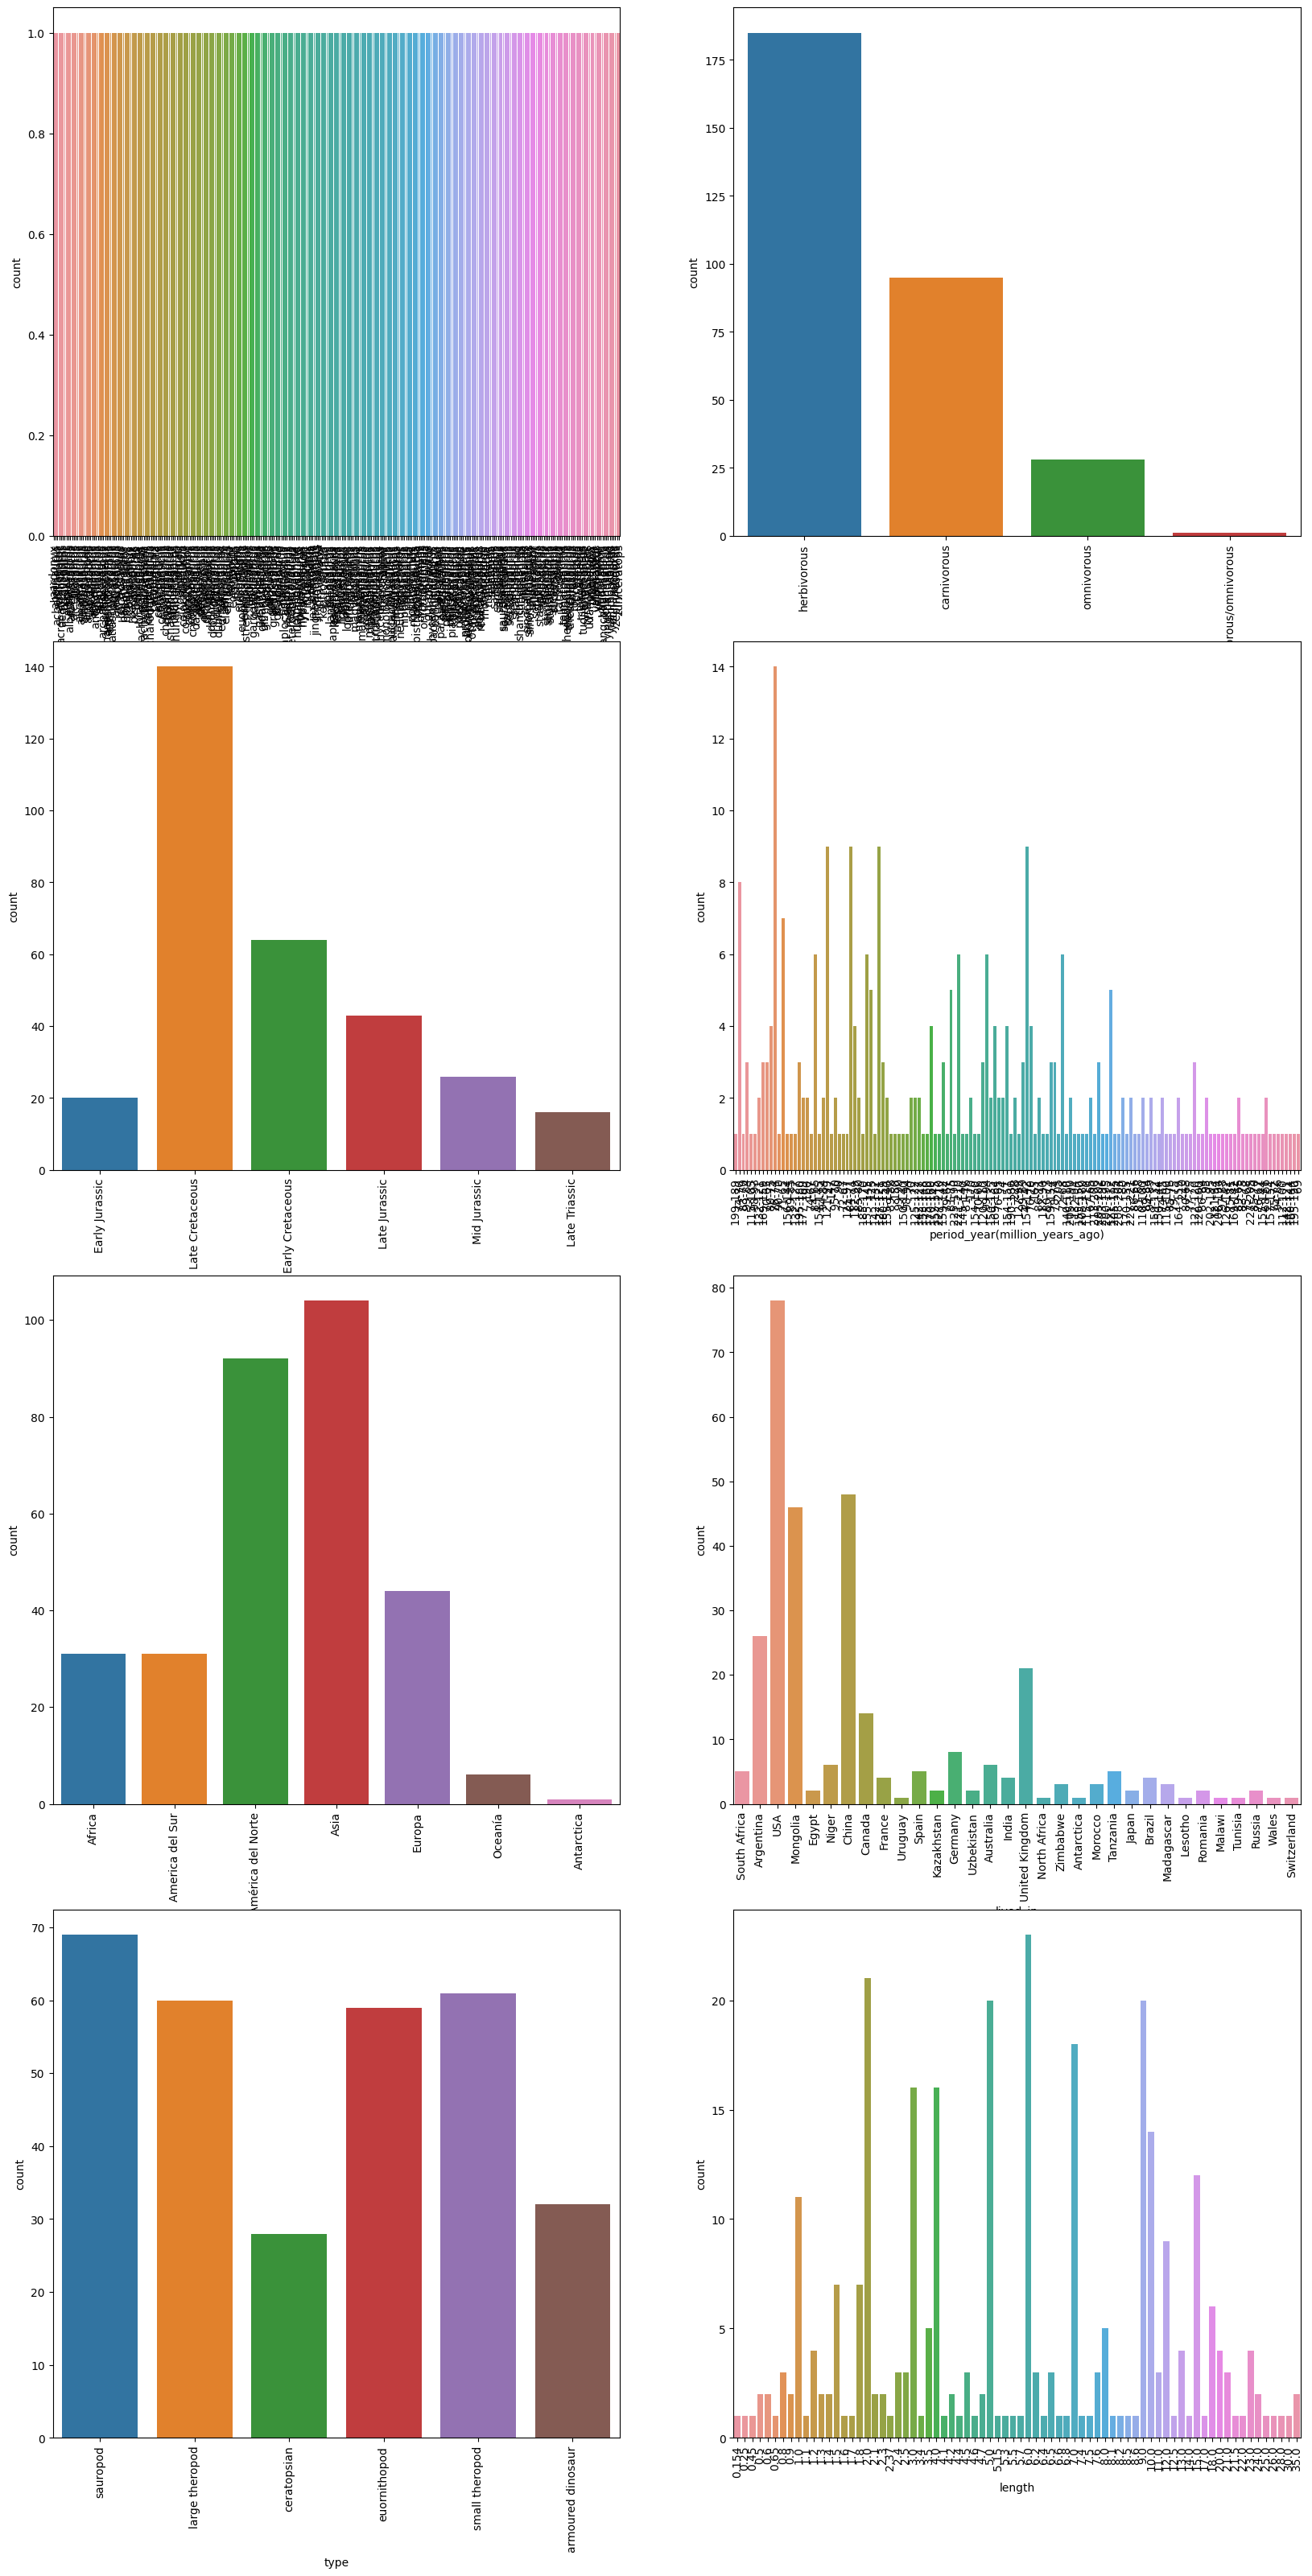

In [ ]:

fig, ax = plt.subplots(4, 2, figsize=(20, 40))
for variable, subplot in zip(dino_data, ax.flatten()):
    sns.countplot(dino_data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90);

### ¿Dónde se han encontrado dinosaurios?

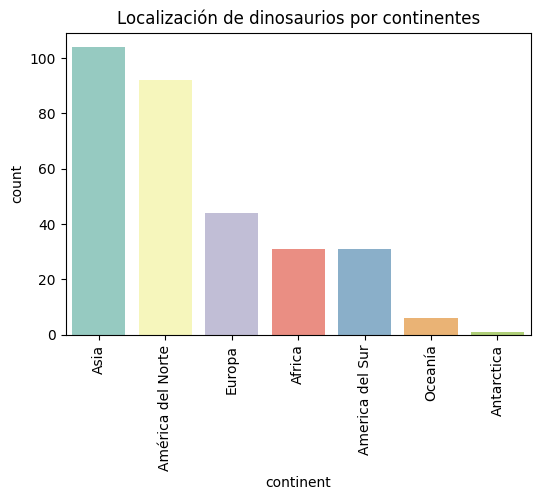

In [ ]:
ax = sns.countplot(x="continent", data = dino_data, order=dino_data["continent"].value_counts().index.tolist(), palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Localización de dinosaurios por continentes")
sns.color_palette("tab10")
plt.show()

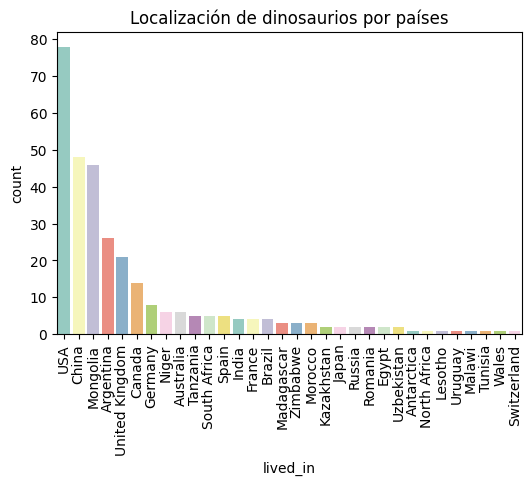

In [ ]:
ax = sns.countplot(x="lived_in", data = dino_data, order=dino_data["lived_in"].value_counts().index.tolist(), palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Localización de dinosaurios por países")
sns.color_palette("tab10")
plt.show()

### Era Mesozoica: la era de los dinosaurios

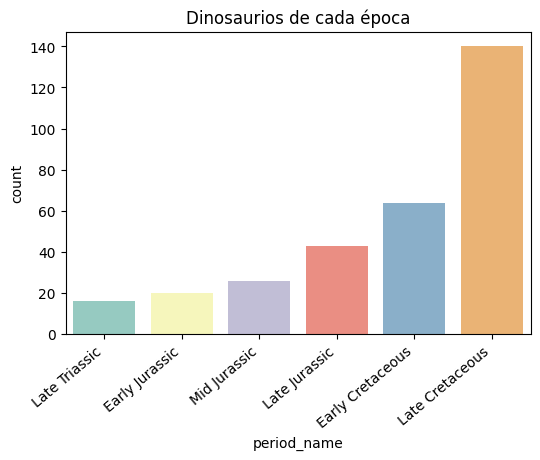

In [ ]:
ax = sns.countplot(x= dino_data["period_name"], order=["Late Triassic", "Early Jurassic", "Mid Jurassic", "Late Jurassic", "Early Cretaceous", "Late Cretaceous"],palette="Set3");

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
plt.title("Dinosaurios de cada época");

In [ ]:
dino_data.period_name.unique()

array(['Early Jurassic', 'Late Cretaceous', 'Early Cretaceous',
       'Late Jurassic', 'Mid Jurassic', 'Late Triassic'], dtype=object)

In [ ]:
dino_data_tria = dino_data[dino_data["period_name"] == "Late Triassic"]
dino_data_tria.head()

name         diet    period_name  \
63     chindesaurus  carnivorous  Late Triassic   
69      coelophysis  carnivorous  Late Triassic   
71   coloradisaurus   omnivorous  Late Triassic   
97         eoraptor  carnivorous  Late Triassic   
122    guaibasaurus  herbivorous  Late Triassic   

    period_year(million_years_ago)          continent   lived_in  \
63                         227-210  América del Norte        USA   
69                         225-190             Africa   Zimbabwe   
71                         221-210    America del Sur  Argentina   
97                             228    America del Sur  Argentina   
122                        221-210    America del Sur     Brazil   

               type  length                                  named_by  
63   small theropod     4.0                     Long and Murry (1995)  
69   small theropod     2.0                                     bauri  
71         sauropod     4.0                          Bonaparte (1978)  
97   small theropod     1.0  Sereno Forster Rogers and Monetta (1993)  
122  small theropod     1.8     Bonaparte Ferigolo and Ribeiro (1999)

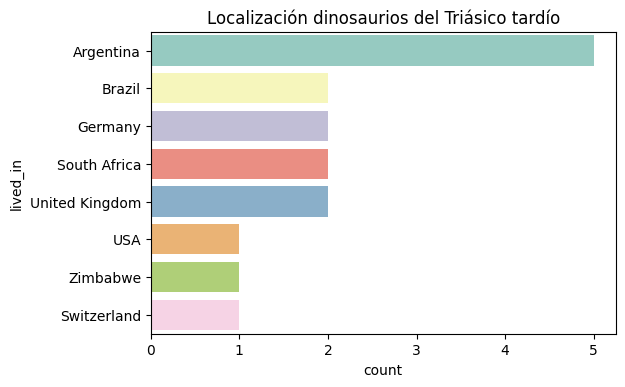

In [ ]:
# Grafico localización dinosaurios del Triasico tardío

ax = sns.countplot(y="lived_in", data=dino_data_tria, order=dino_data_tria["lived_in"].value_counts().index.tolist(), palette="Set3")
plt.title("Localización dinosaurios del Triásico tardío")
plt.show()

In [ ]:
dino_data_ear_jur = dino_data[dino_data["period_name"] == "Early Jurassic"]
dino_data_ear_jur.head()

name         diet     period_name  \
0          aardonyx  herbivorous  Early Jurassic   
16       ammosaurus  herbivorous  Early Jurassic   
20      anchisaurus  herbivorous  Early Jurassic   
40     barapasaurus  herbivorous  Early Jurassic   
76  cryolophosaurus  carnivorous  Early Jurassic   

   period_year(million_years_ago)          continent      lived_in  \
0                         199-189             Africa  South Africa   
16                        195-180  América del Norte           USA   
20                            190  América del Norte           USA   
40                        185-170               Asia         India   
76                            170         Antarctica    Antarctica   

              type  length                                           named_by  
0         sauropod     8.0  Yates Bonnan Neveling Chinsamy and Blackbeard ...  
16        sauropod     5.0                                       Marsh (1891)  
20        sauropod     2.0                                       Marsh (1885)  
40        sauropod    14.0     Jain Kutty Roy-Chowdhury and Chatterjee (1975)  
76  large theropod     8.0                        Hammer and Hickerson (1994)

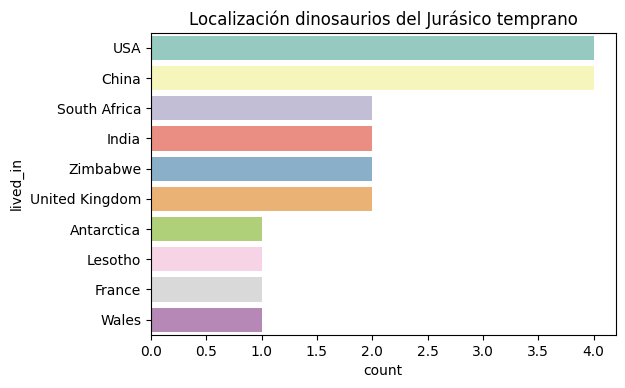

In [ ]:
# Grafico localización dinosaurios del Jurásico temprano

ax = sns.countplot(y="lived_in", data=dino_data_ear_jur, order=dino_data_ear_jur["lived_in"].value_counts().index.tolist(),palette="Set3")
plt.title("Localización dinosaurios del Jurásico temprano")
plt.show()

In [ ]:
dino_data_mid_jur = dino_data[dino_data["period_name"] == "Mid Jurassic"]

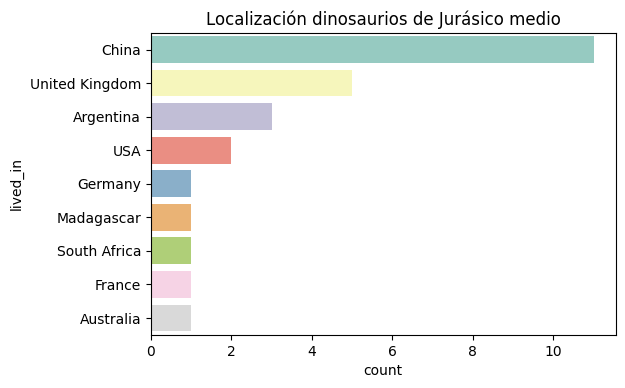

In [ ]:
# Grafico localización dinosaurios del Jurásico Medio

ax = sns.countplot(y="lived_in", data=dino_data_mid_jur, order=dino_data_mid_jur["lived_in"].value_counts().index.tolist(),palette="Set3")
plt.title("Localización dinosaurios de Jurásico medio")
plt.show()

In [ ]:
dino_data_late_jur = dino_data[dino_data["period_name"] == "Late Jurassic"]

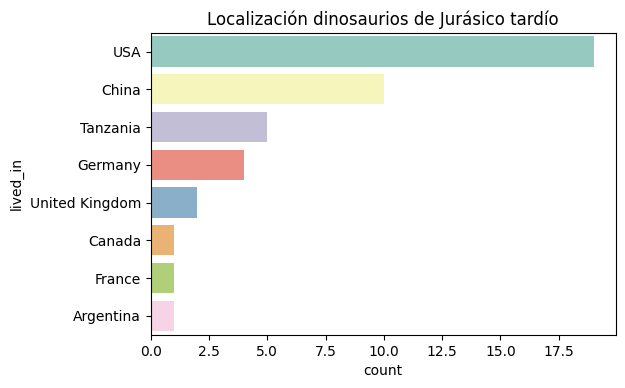

In [ ]:
# Grafico localización dinosaurios del Jurásico Tardio

ax = sns.countplot(y="lived_in", data=dino_data_late_jur, order=dino_data_late_jur["lived_in"].value_counts().index.tolist(),palette="Set3")
plt.title("Localización dinosaurios de Jurásico tardío")
plt.show()

In [ ]:
dino_data_ear_cret = dino_data[dino_data["period_name"] == "Early Cretaceous"]

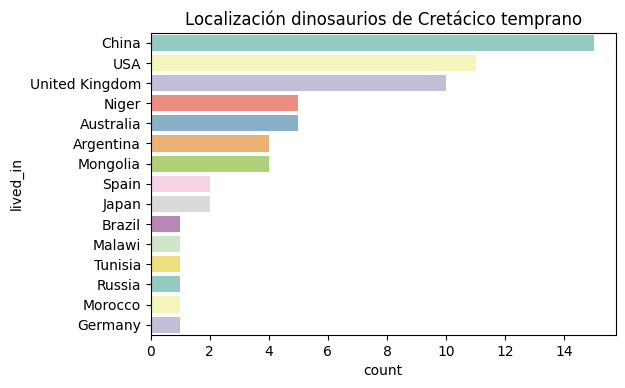

In [ ]:
# Grafico localización dinosaurios del Cretacico Temprano

ax = sns.countplot(y="lived_in", data=dino_data_ear_cret, order=dino_data_ear_cret["lived_in"].value_counts().index.tolist(),palette="Set3")
plt.title("Localización dinosaurios de Cretácico temprano")
plt.show()

In [ ]:
dino_data_late_cret = dino_data[dino_data["period_name"] == "Late Cretaceous"]

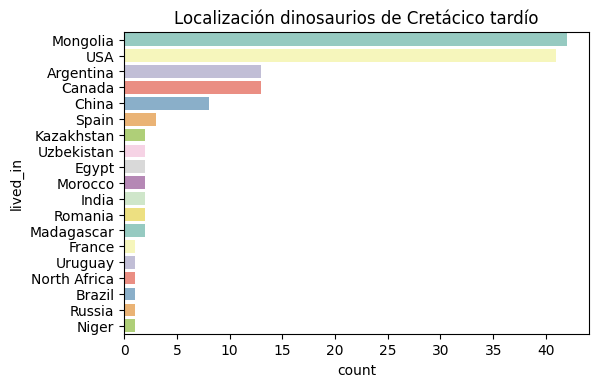

In [ ]:
# Grafico localización dinosaurios del Cretacico Tardío

ax = sns.countplot(y="lived_in", data=dino_data_late_cret, order=dino_data_late_cret["lived_in"].value_counts().index.tolist(),palette="Set3")
plt.title("Localización dinosaurios de Cretácico tardío")
plt.show()

### Tipos de dinosaurios

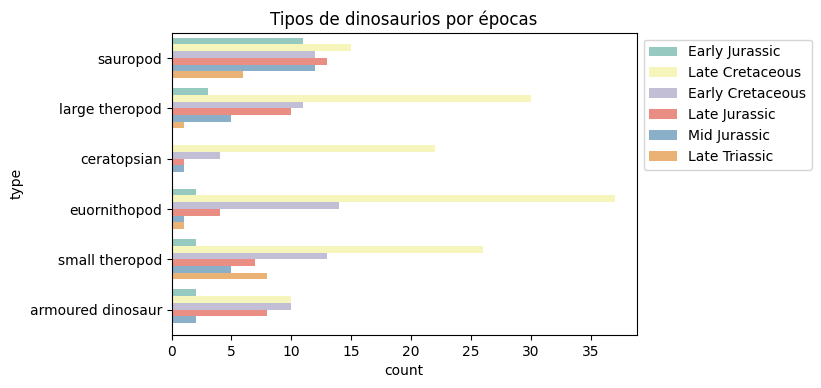

In [ ]:
# Grafico tipos de dinosaurios según su periodo

ax = sns.countplot(y="type", data=dino_data,hue= "period_name", palette="Set3")
plt.title("Tipos de dinosaurios por épocas")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show();

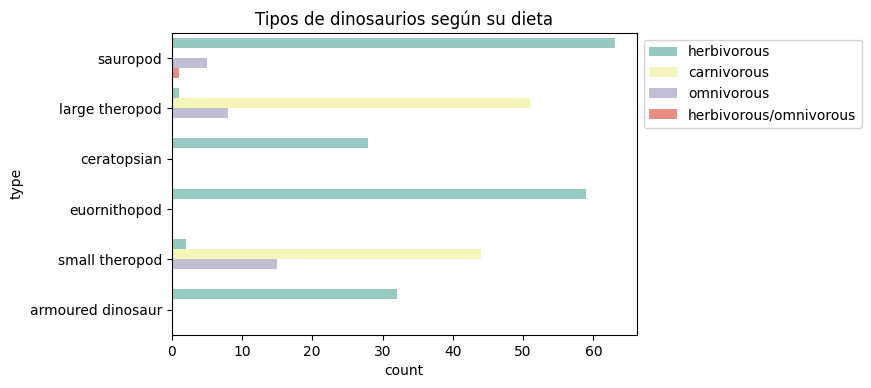

In [ ]:
# Grafico tipos de dinosaurios según su dieta

ax = sns.countplot(y="type", data=dino_data,hue= "diet", palette="Set3")
plt.title("Tipos de dinosaurios según su dieta")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show();

### Longitud de los dinosaurios

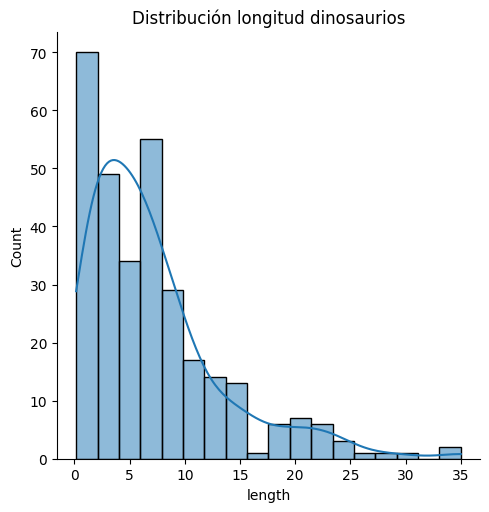

In [ ]:
# Densidad según la longitud
sns.displot(data=dino_data, x= "length", kde=True)
plt.title("Distribución longitud dinosaurios");

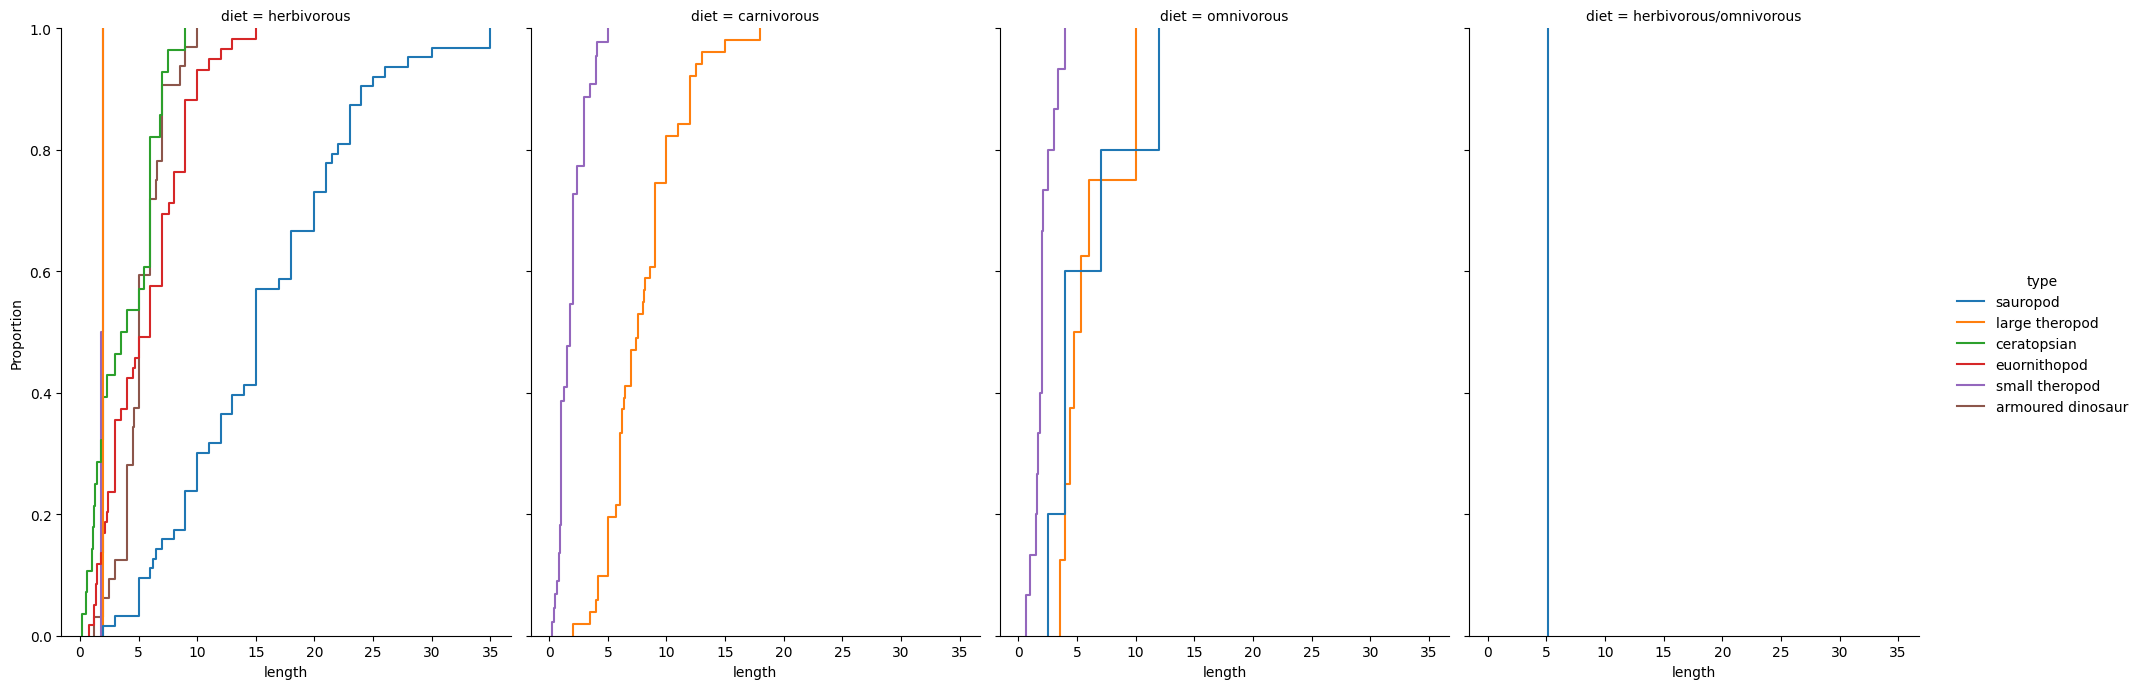

In [ ]:
# fig, ax = plt.subplots(2, 2, figsize=(20, 20))
fig = sns.displot(data=dino_data,
                x="length", 
                hue= "type", 
                col= "diet", 
                kind= "ecdf",
                height=7, 
                aspect=.7);

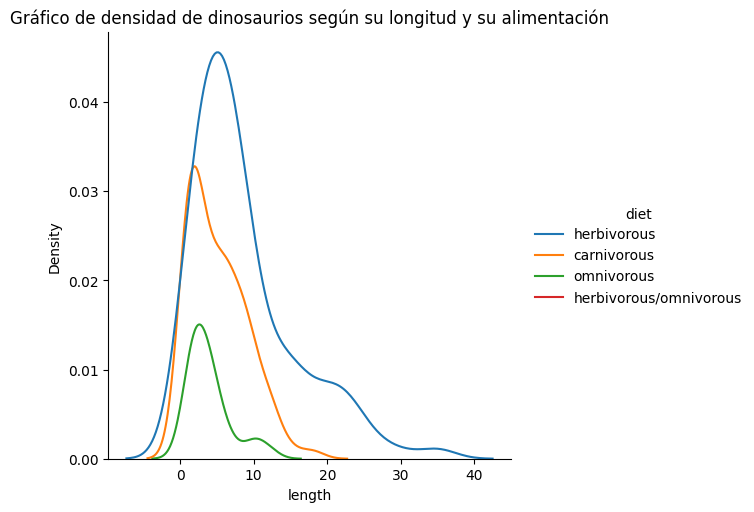

In [ ]:
# Densidad según la longitud y su tipo de dieta
sns.displot(data=dino_data,x="length", hue= "diet", kind= "kde", warn_singular=False)
plt.title("Gráfico de densidad de dinosaurios según su longitud y su alimentación");

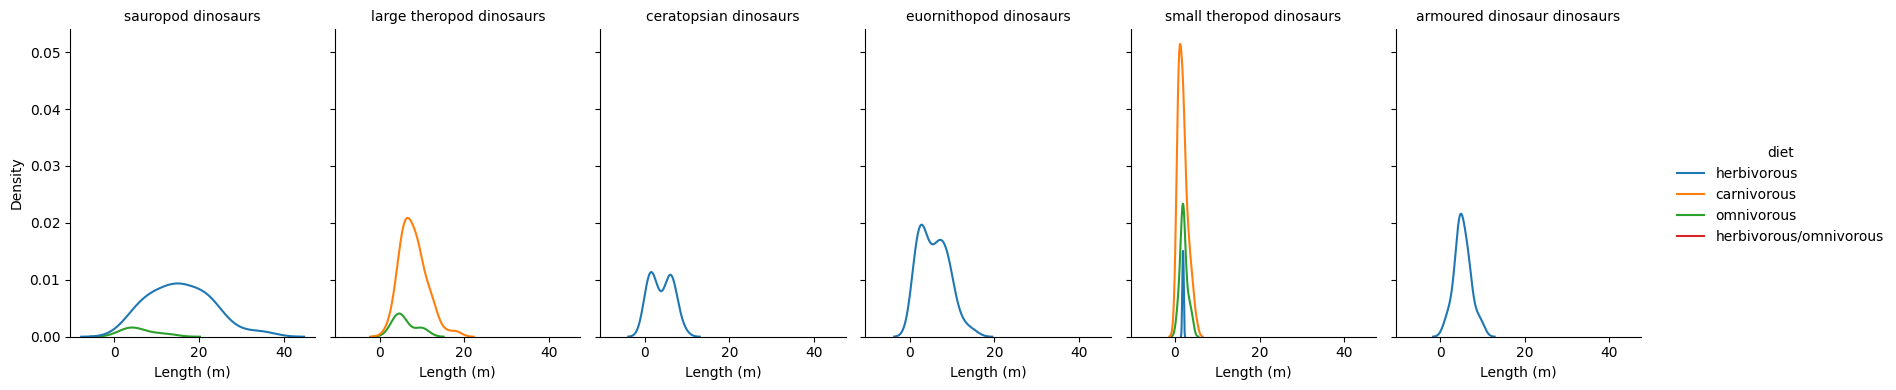

In [ ]:
#plt.figure(figsize=(36,56))
g = sns.displot(
    data=dino_data, x="length", hue="diet", col="type",
    kind="kde", height=4, aspect=.7, warn_singular=False
)
g.set_axis_labels("Length (m)", "Density")
g.set_titles("{col_name} dinosaurs");

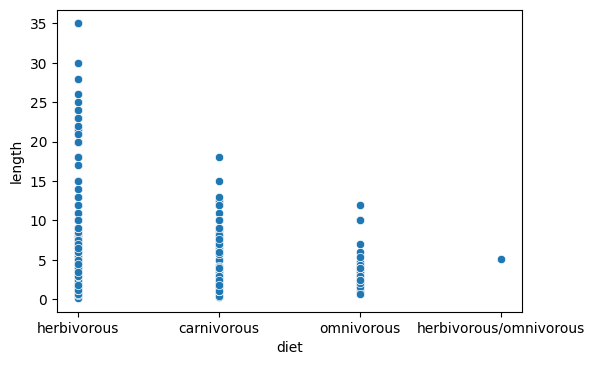

In [ ]:
sns.scatterplot(data=dino_data, y="length", x="diet");

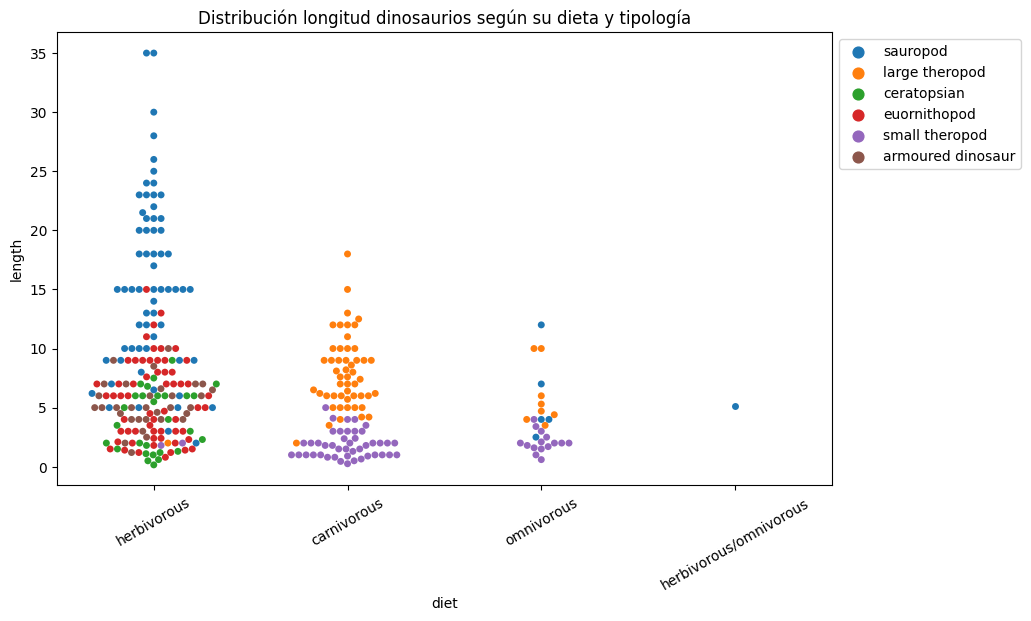

In [ ]:
# Gráfico enjambre, para visualizar la longitud de los dinosaurios por tipo de alimentación e identificando su tipología
plt.figure(figsize=(10,6))
sns.swarmplot(x="diet", y = "length", hue= "type", data=dino_data)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=30)
plt.title("Distribución longitud dinosaurios según su dieta y tipología");

In [ ]:
# Complemento con graficos de Tableau